In [1]:
import numpy as np
import pandas as pd
import interpret

from interpret.glassbox import ExplainableBoostingClassifier as ebc
from sklearn.model_selection import train_test_split
from interpret import show

from interpret.visual.plot import plot_bar
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import matplotlib
matplotlib.rcParams.update({'font.size': 24})

In [2]:
# Load data.
data_dir = ""
feat_names_df = pd.read_csv("{}/featureNames.txt".format(data_dir), sep='\t', header=None)
feat_names = feat_names_df[1].values

train_df = pd.read_csv("{}/medis9847c.data".format(data_dir), sep='\t', header=None)
train_df = train_df.drop(train_df.columns[47], axis=1) # Drop the target.
train_df.columns = feat_names

test_df = pd.read_csv("{}/medis9847c.test".format(data_dir), sep='\t', header=None)
test_df = test_df.drop(test_df.columns[47], axis=1)
test_df.columns = feat_names

df = pd.concat([train_df, test_df])
Y = df['outcome (0=lines, 1=dies)']
X = df.copy()
X = df.drop('outcome (0=lines, 1=dies)', axis=1)
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)
X.shape, Y.shape

((14199, 46), (14199,))

# Helper functions for pretty plotting and automated, systematic available from:
[https://github.com/blengerich/ebm_utils](github.com/blengerich/ebm_utils)

# Install by
```pip install git+https://github.com/blengerich/ebm_utils```

,Feature,Value,# Samples,Effect Size,P-Ratio
24,respiration_rate,42.00,355.0,1.314215,97.0
94,pO2,62.00,2295.0,1.525680,969.5000000000016
66,potassium_level,2.10,393.0,1.247155,86.79999999999997
27,systolic_blood_pressure,79.00,344.0,1.204478,64.0
98,pCO2,69.00,202.0,1.372771,64.0
99,WBC_count,0.30,316.0,1.223724,63.80000000000001
100,WBC_count,4.70,857.0,2.051942,616.0000000000007
57,BUN_level,50.00,252.0,1.263805,59.0
21,respiration_rate,30.00,2056.0,1.299734,539.0
84,pO2,32.90,570.0,2.504453,523.3


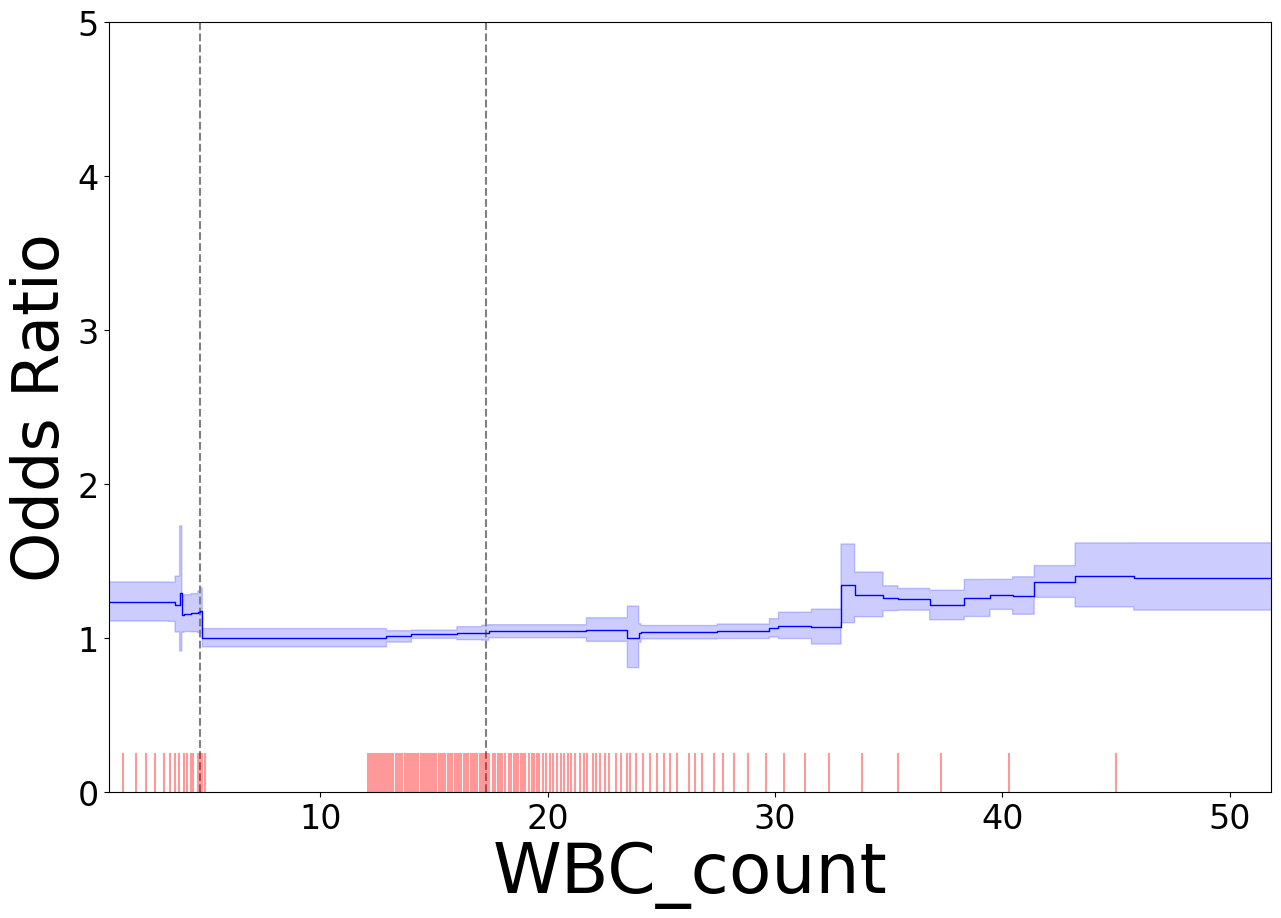

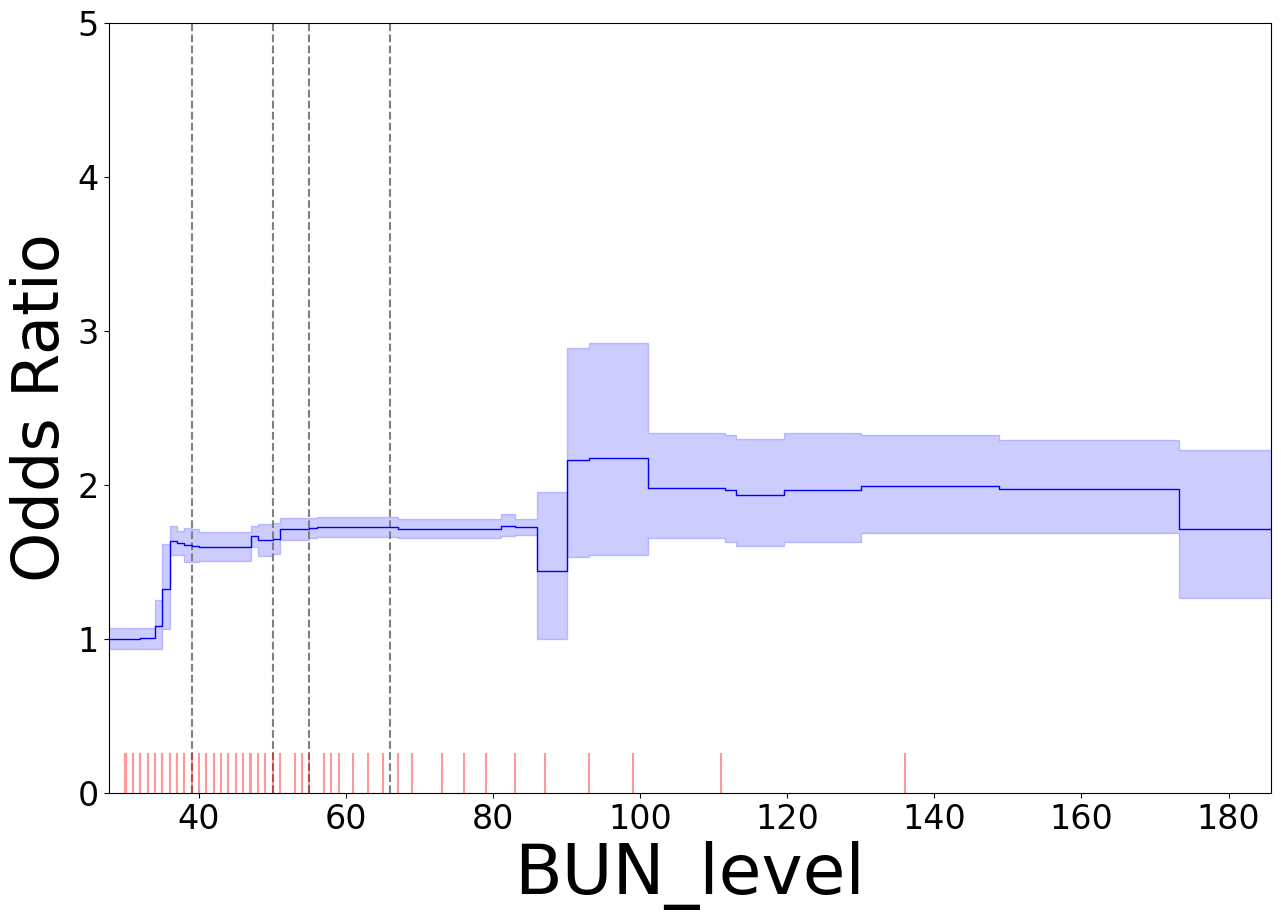

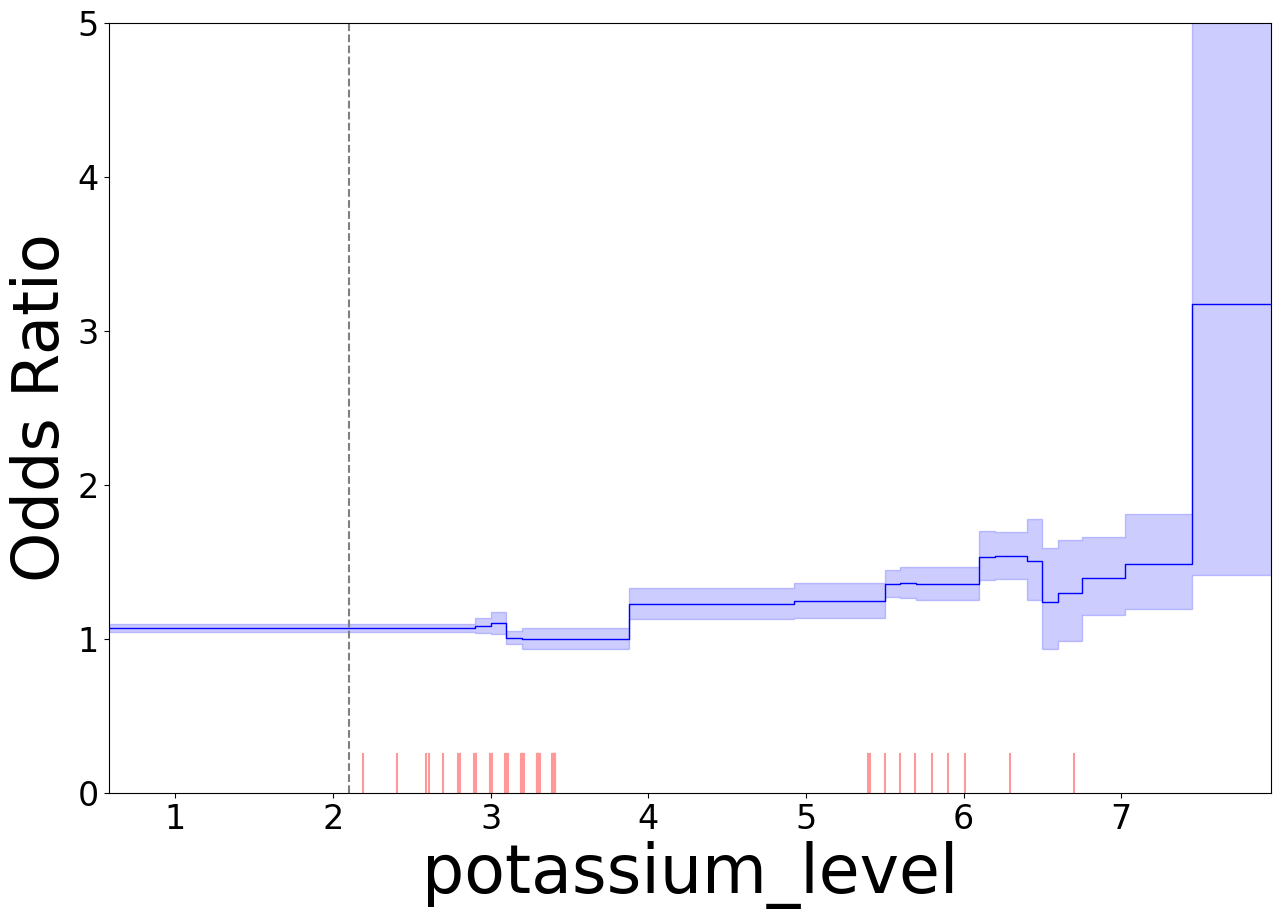

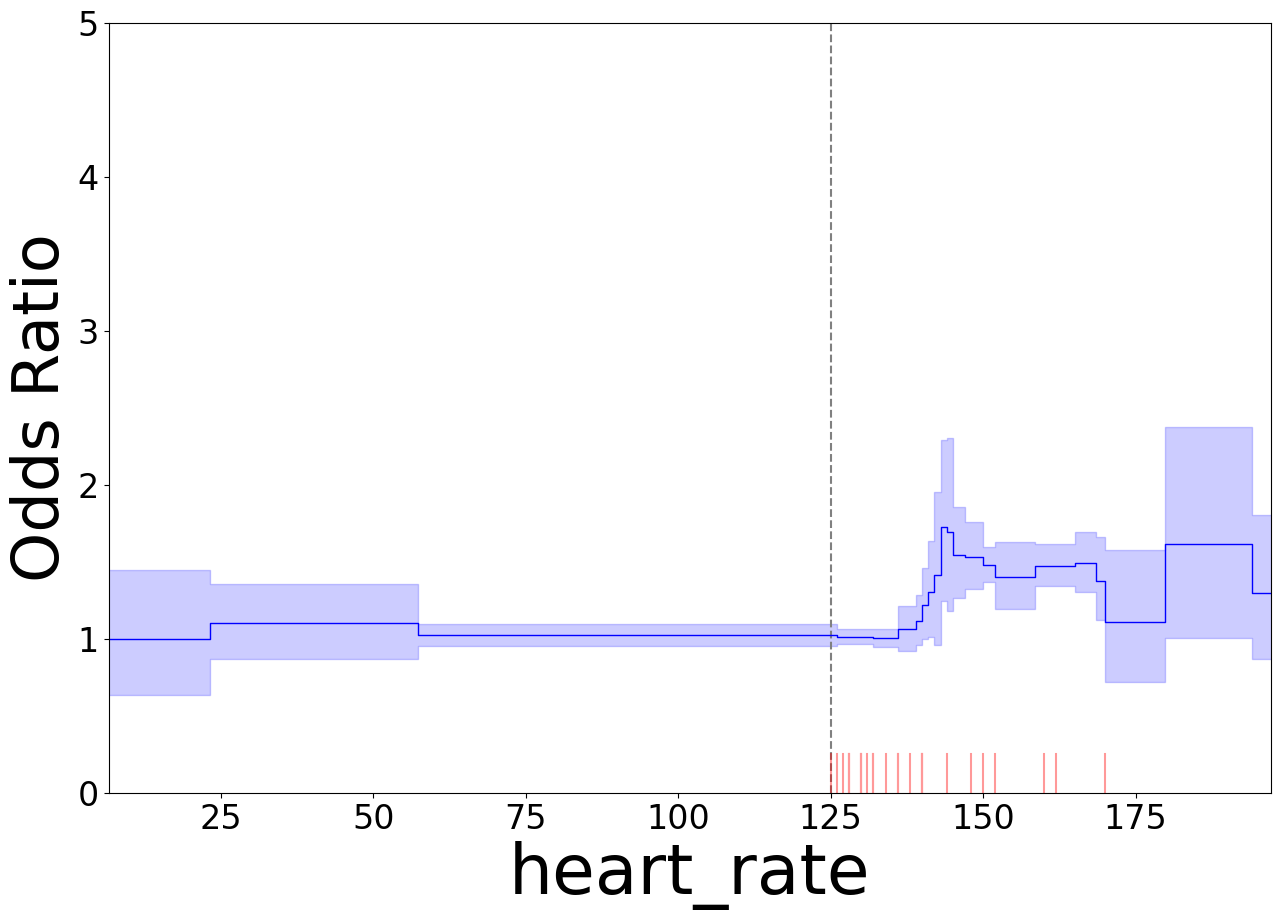

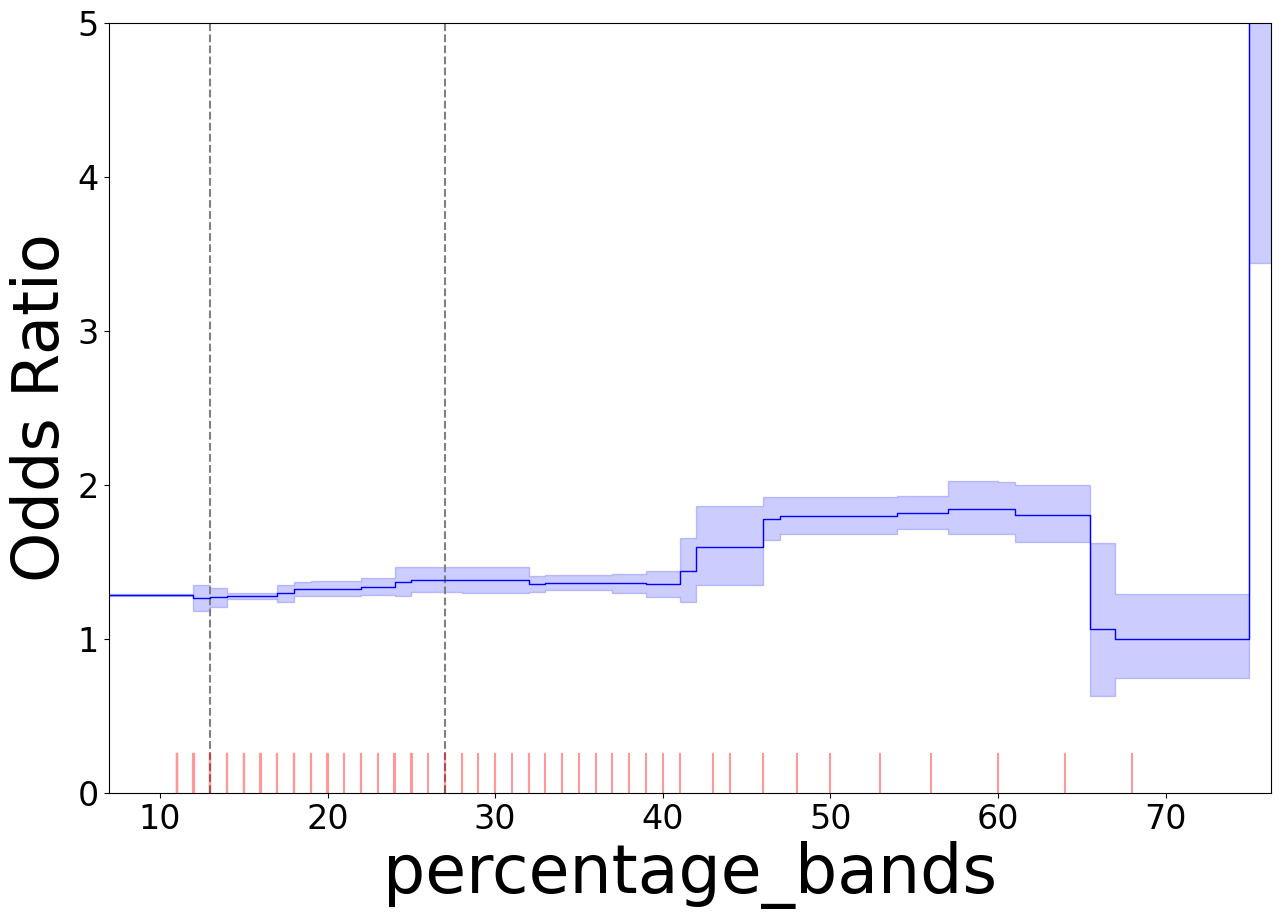

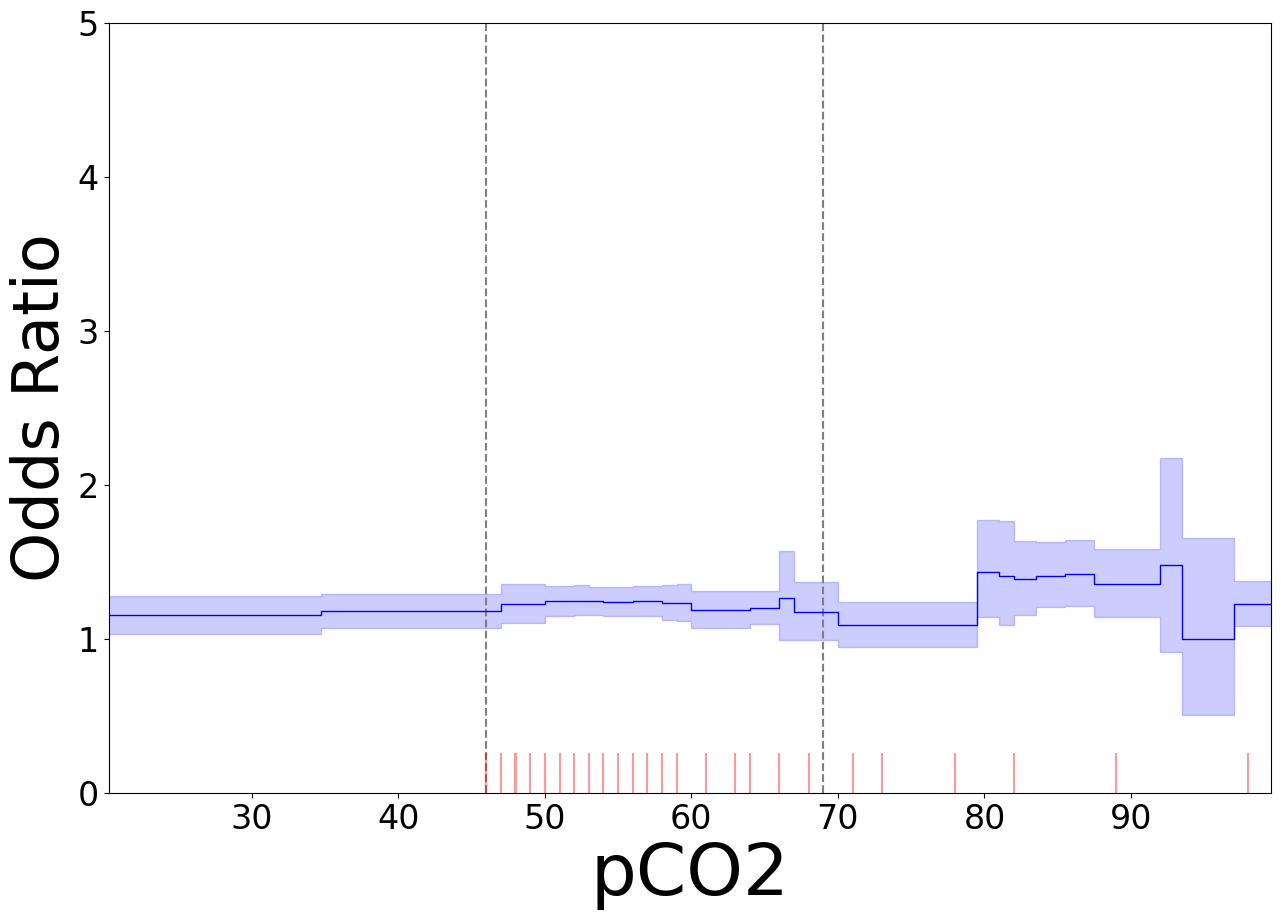

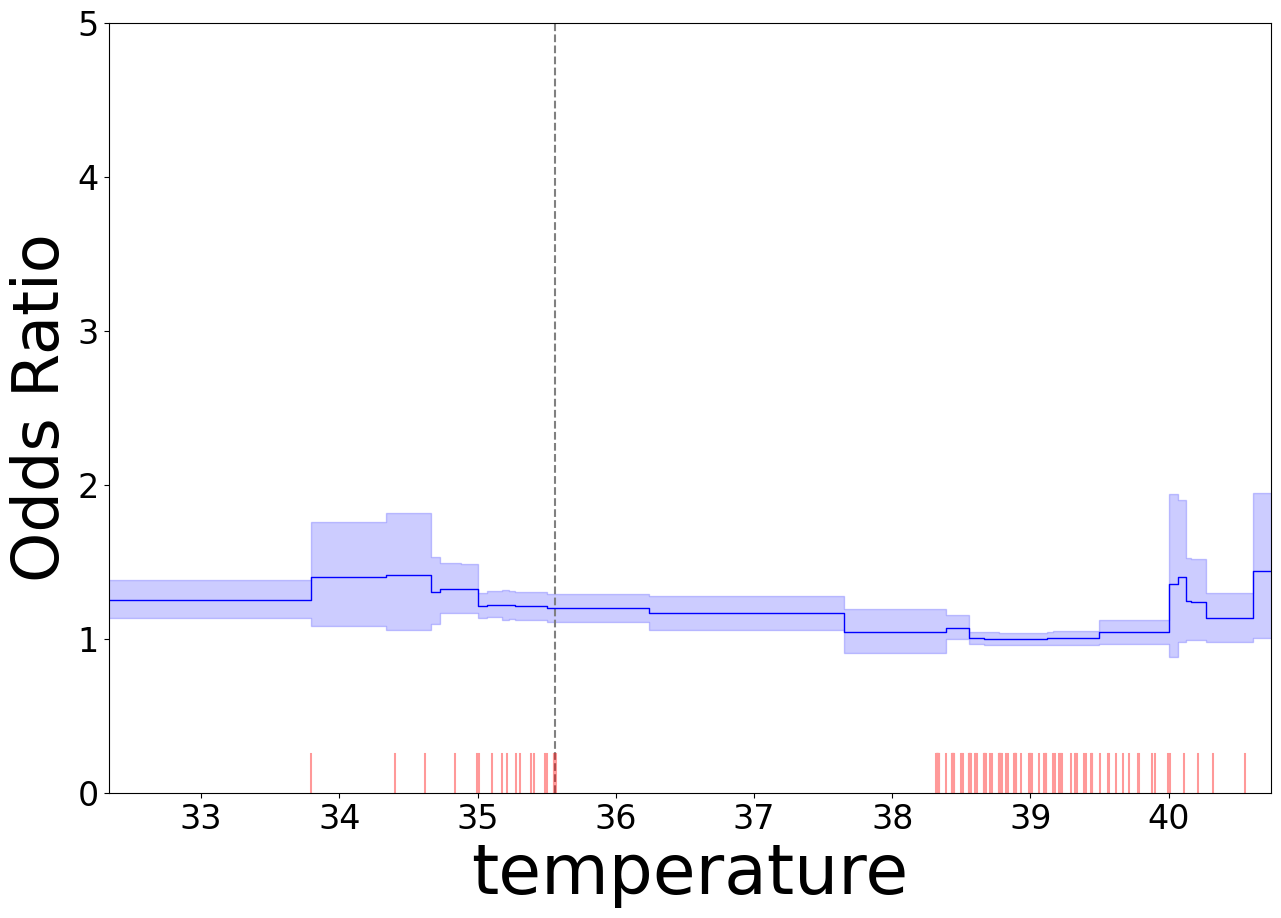

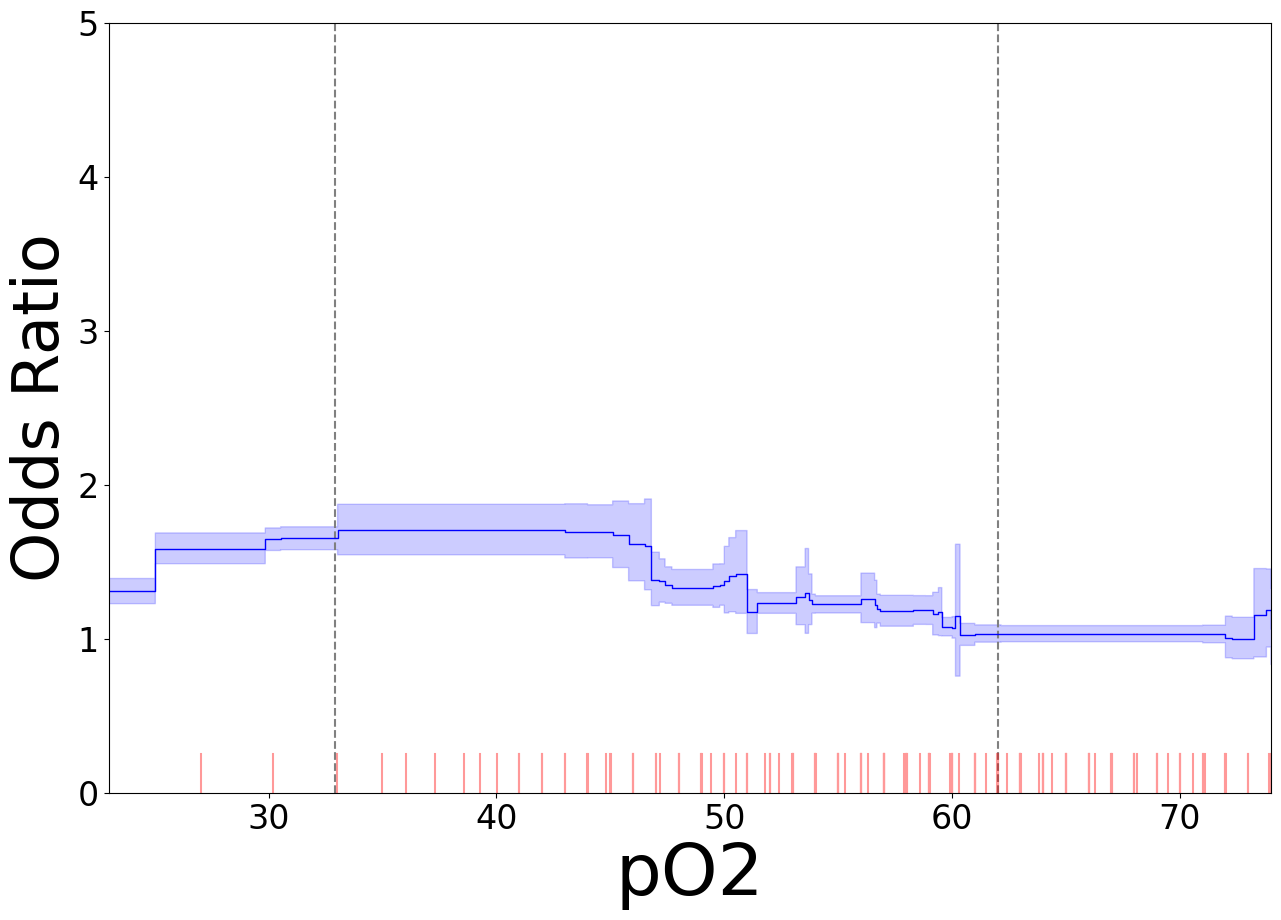

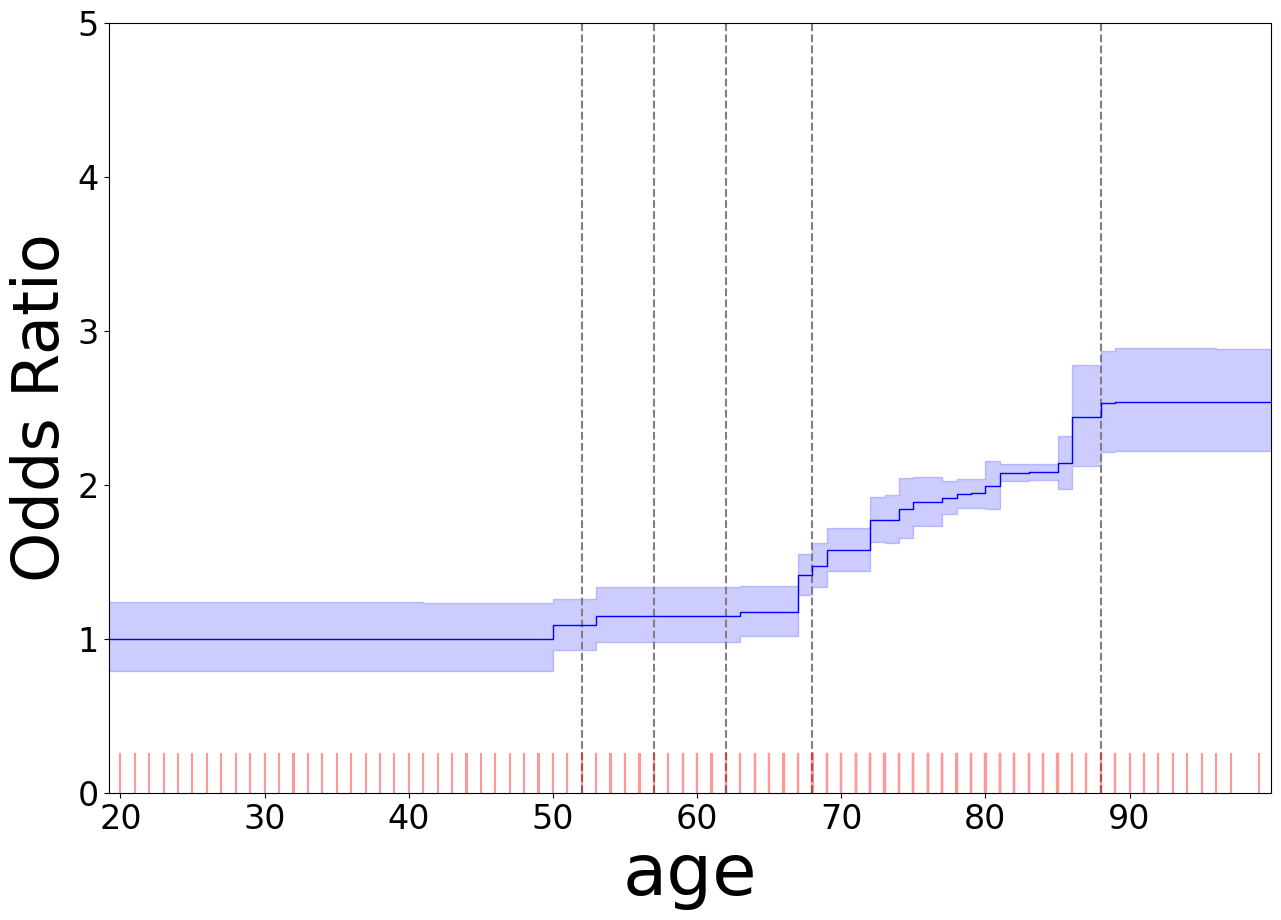

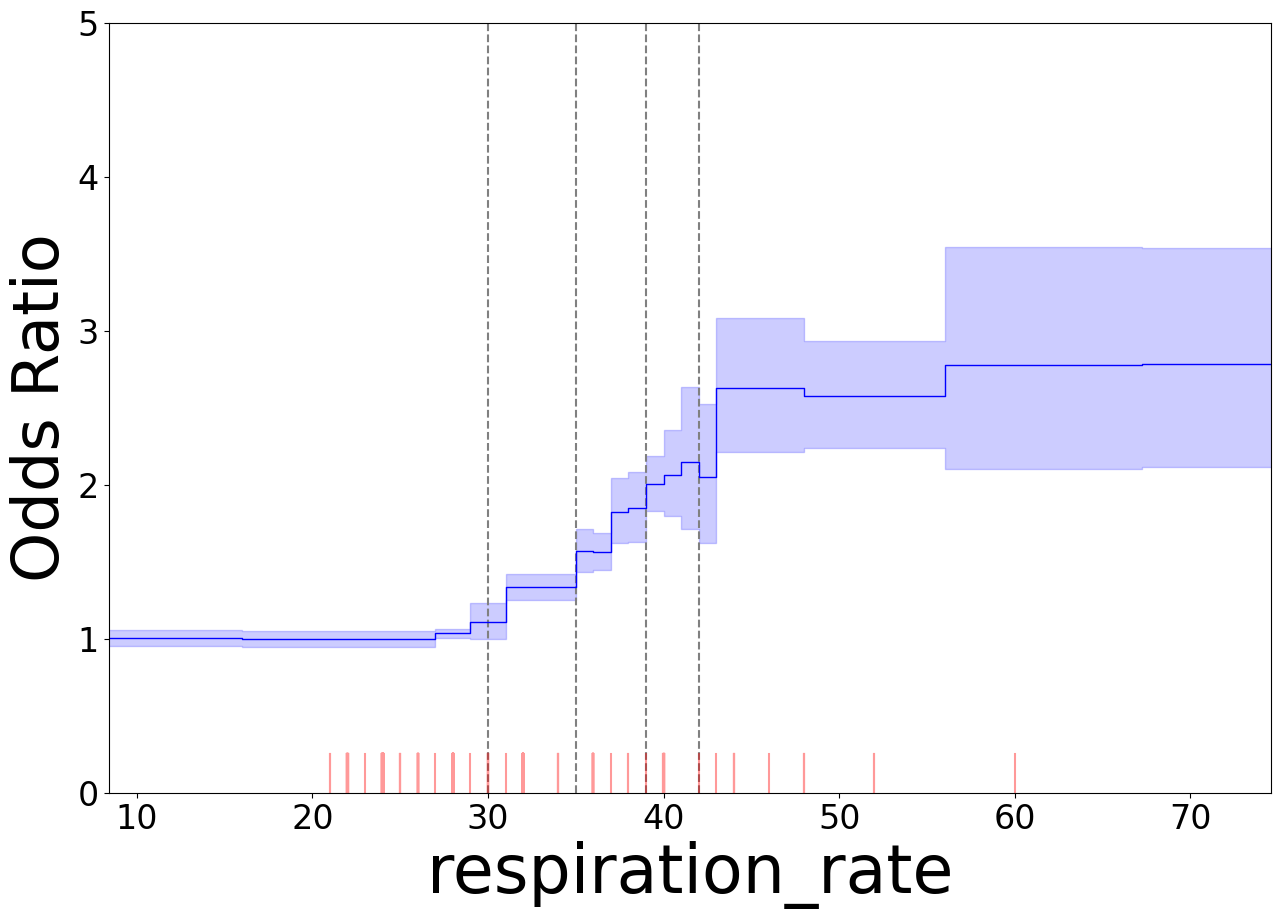

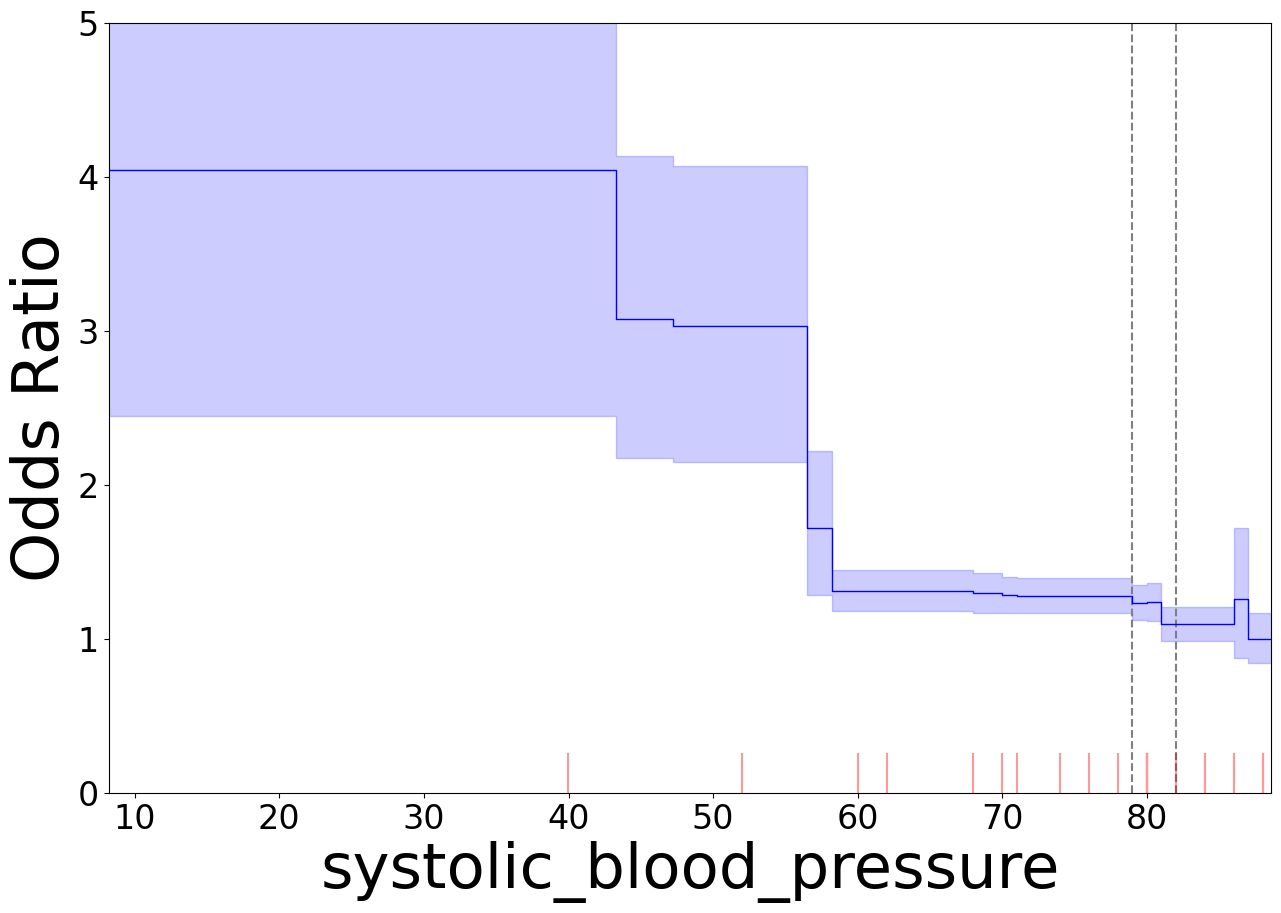

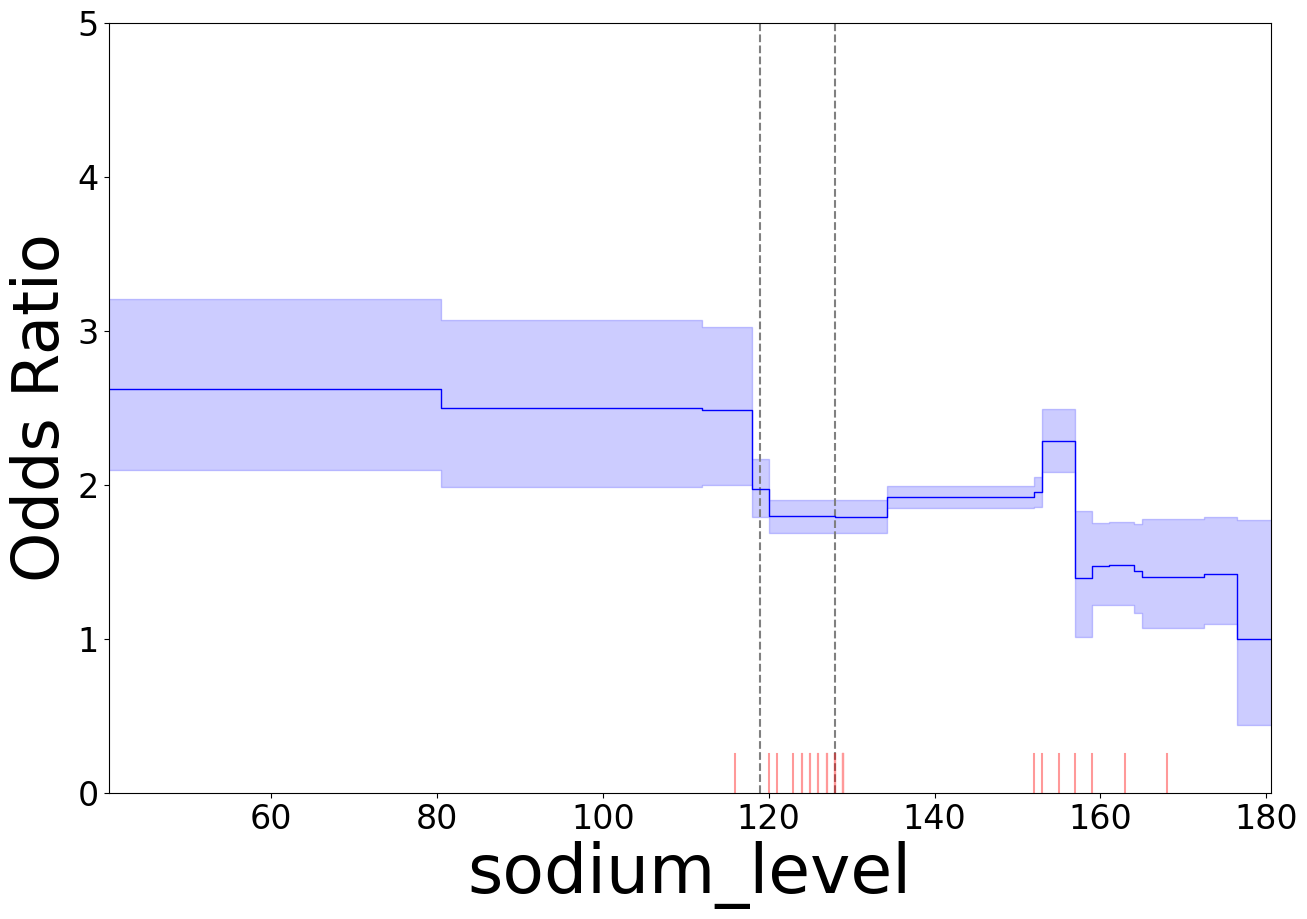

In [3]:
# Automatically find discontinuous effects.
from ebm_utils.analysis.changepoints import find_and_plot_discontinuities
find_and_plot_discontinuities(X, Y, min_samples=200, min_effect_size=1.2)

,Feature,Value
0,heart_rate,148.008287
1,systolic_blood_pressure,40.008707
2,albumin_level,2.400000
3,glucose_level,312.000000
4,pH,7.120000
5,pO2,43.998227
6,pO2,56.701458


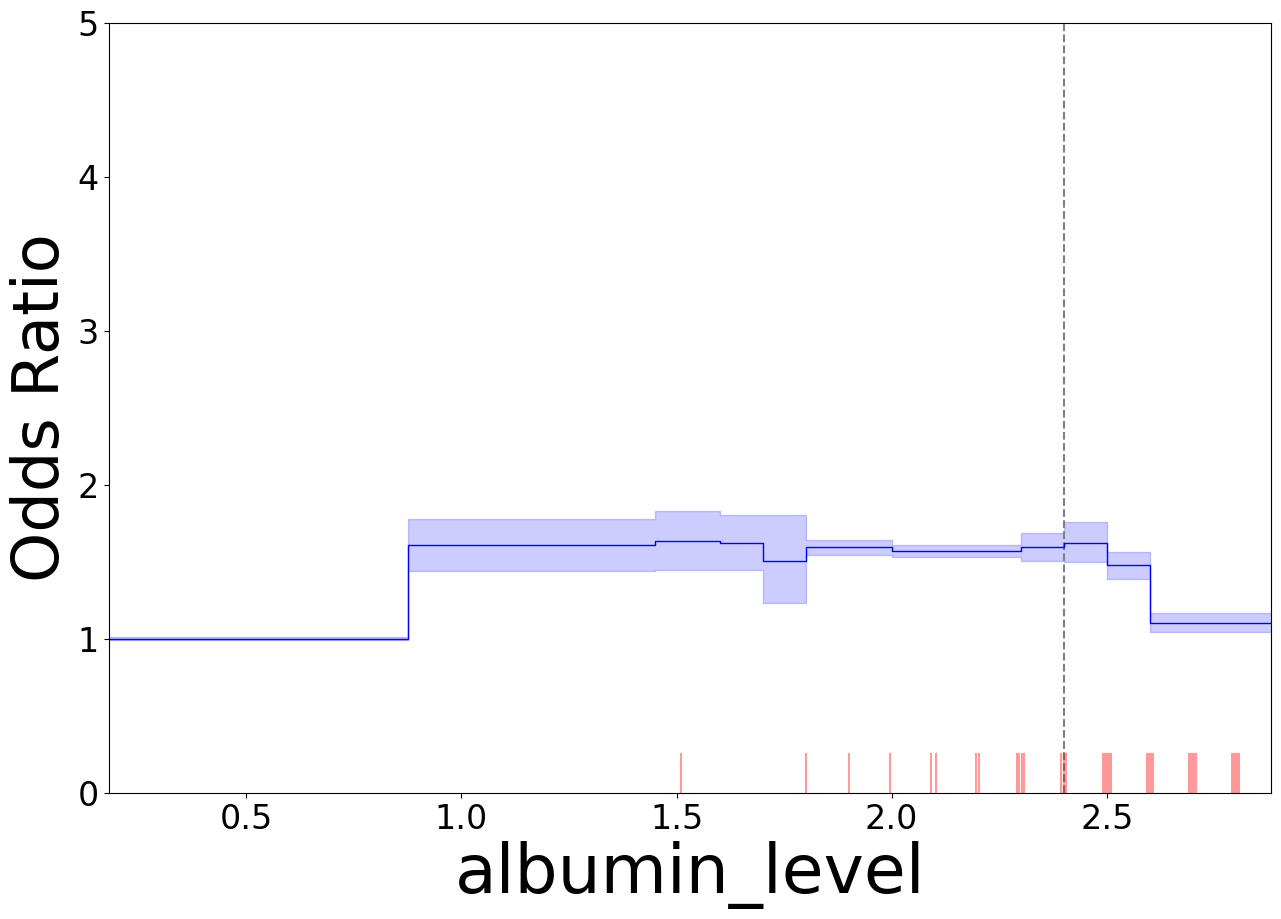

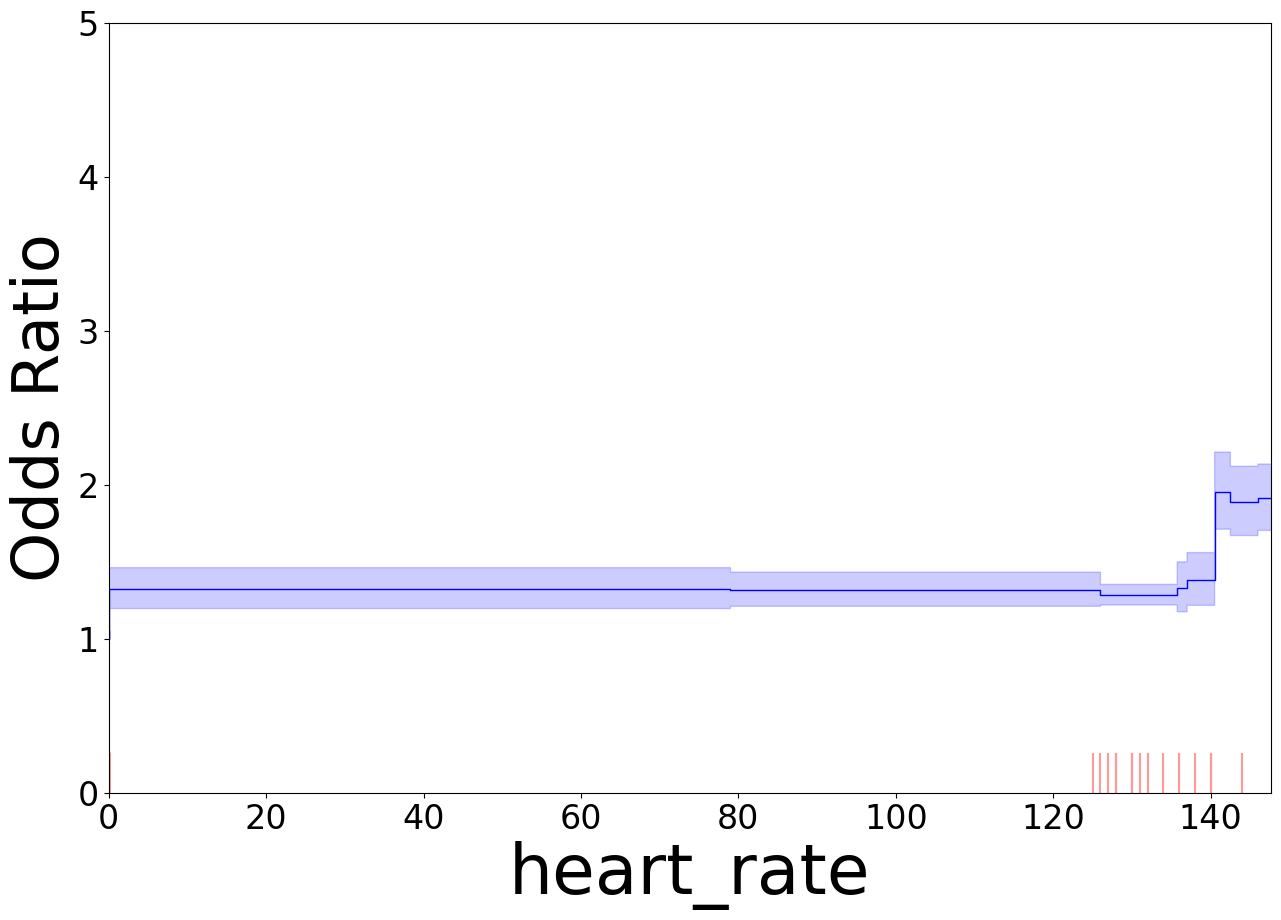

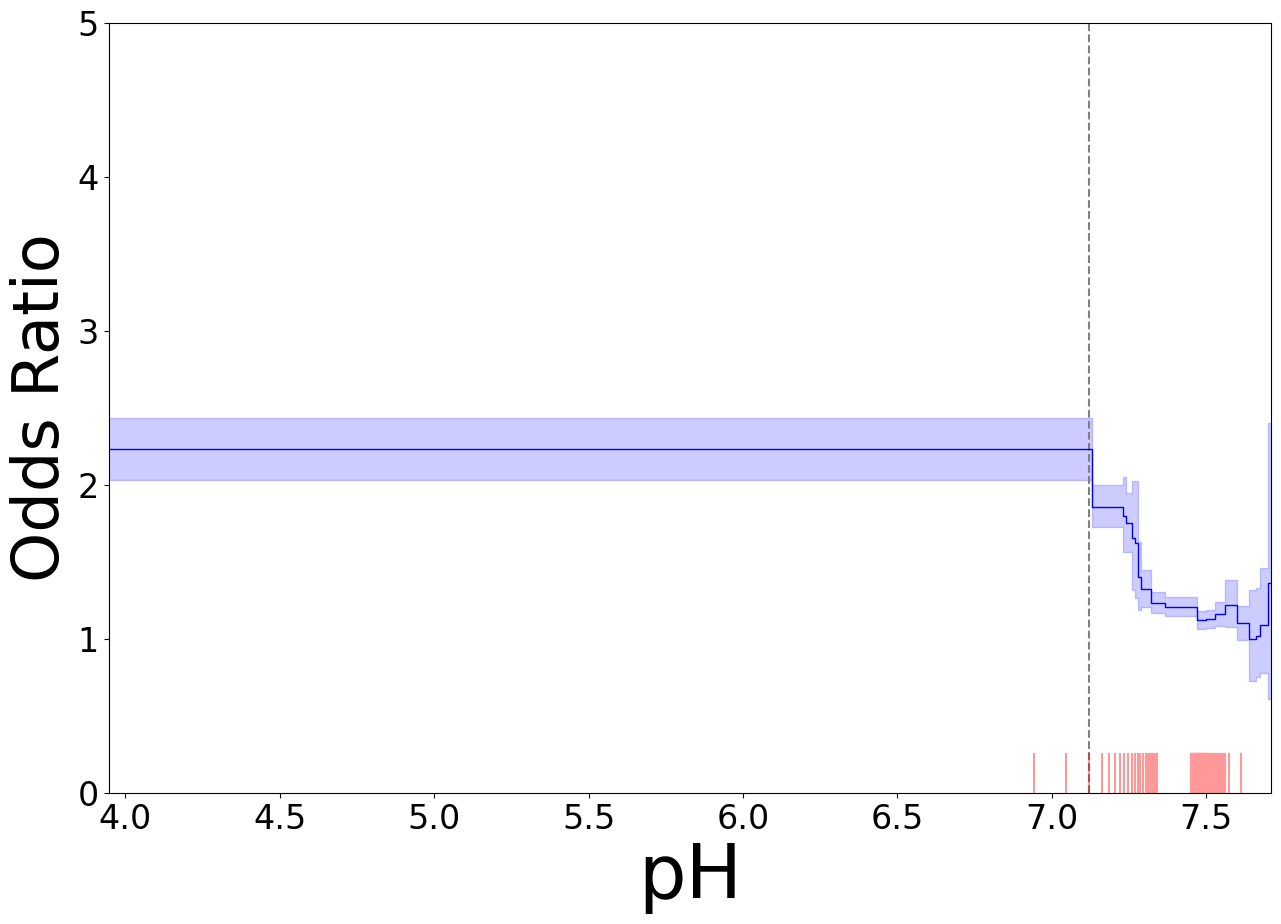

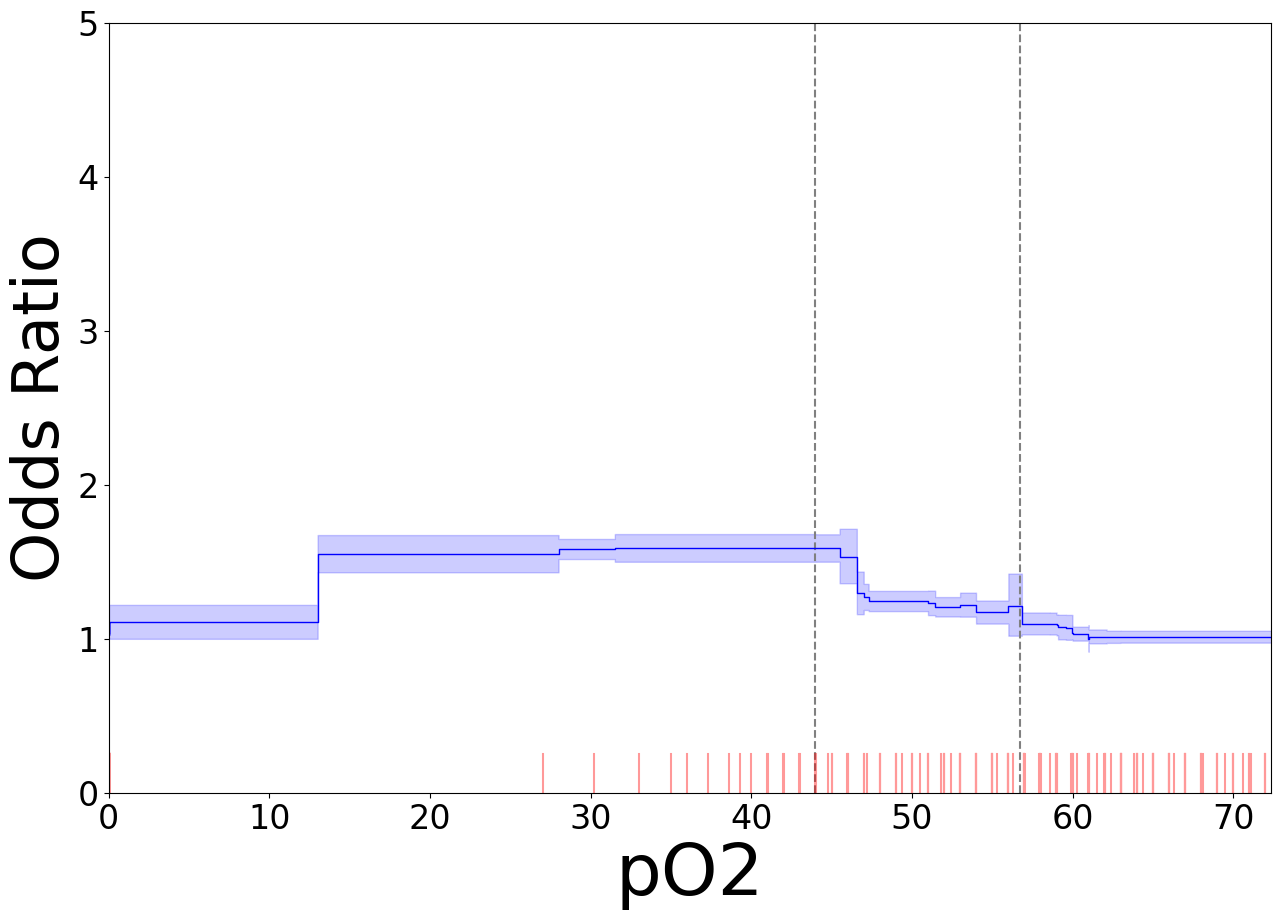

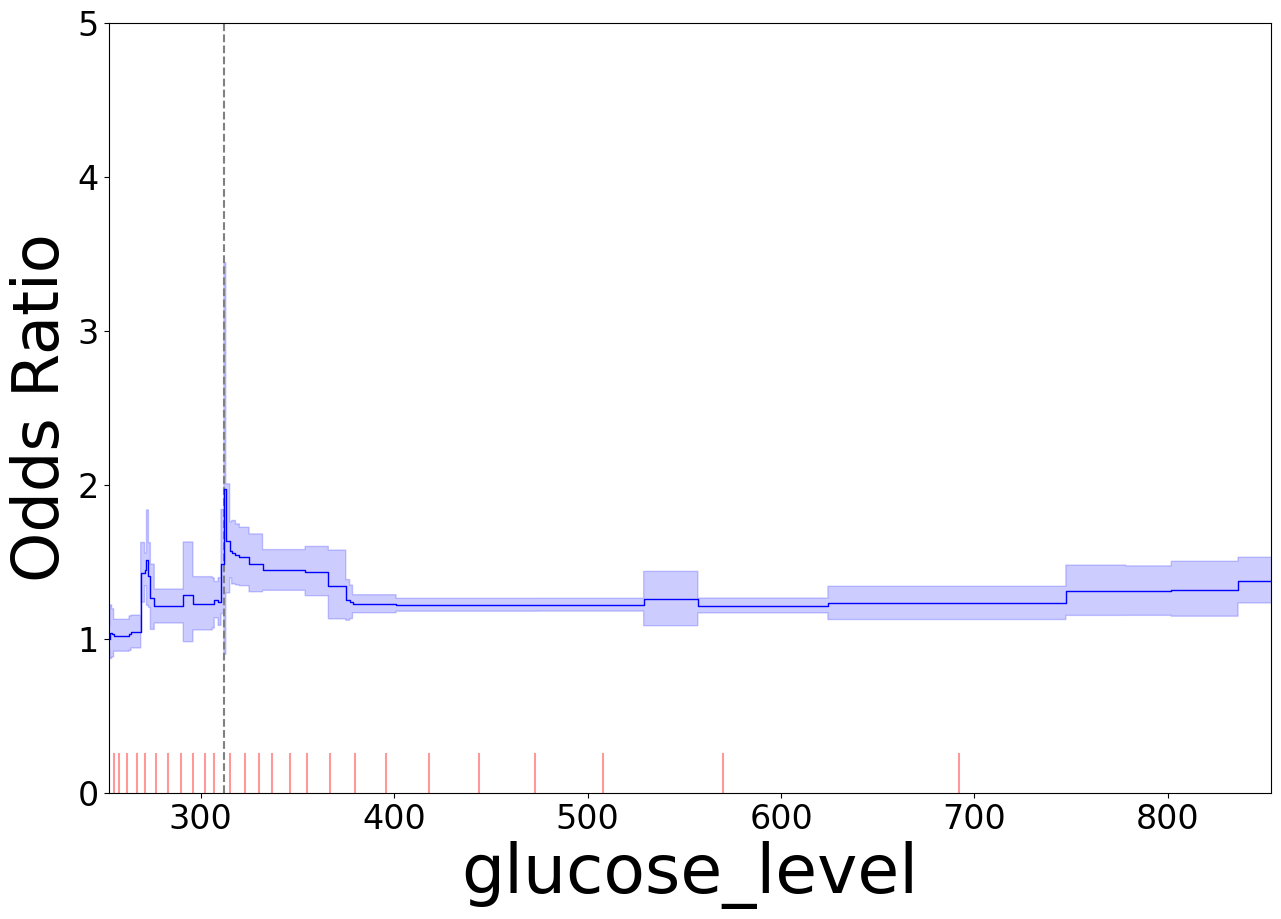

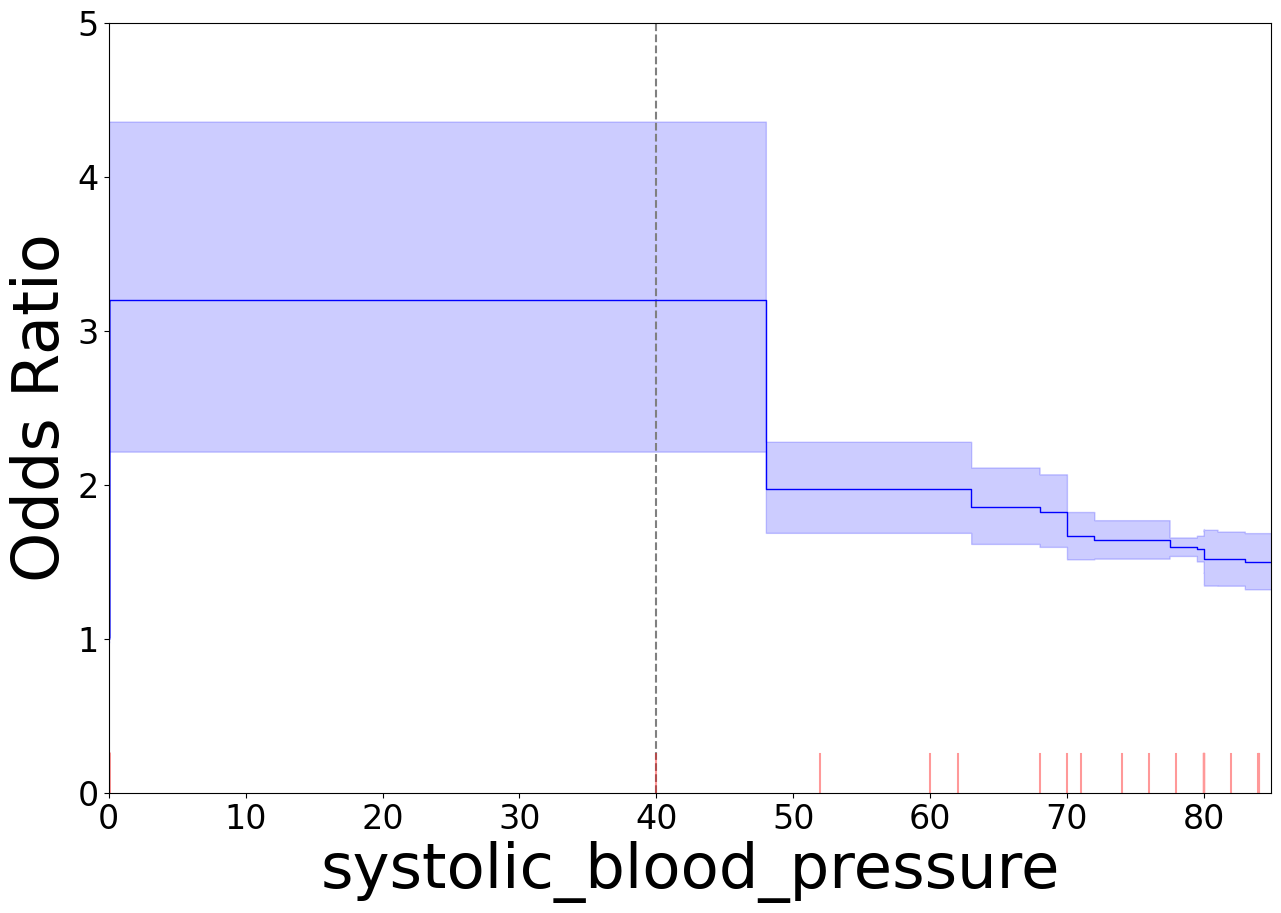

In [4]:
# Automatically find non-montone effects.
from ebm_utils.analysis.changepoints import find_and_plot_non_monotonicities
find_and_plot_non_monotonicities(X, Y.values, prob_threshold=0.1, counter_causal_only=True)

In [5]:
# Build and fit a high-fidelity additive model.
from experiment_utils import run_experiment
ebm, ebm_global = run_experiment(X, Y)

LR
AUC	Train:0.78
AUC	Test:0.76
APS	Train:0.33
APS	Test:0.30
F1	Train:0.23
F1	Test:0.21
XGB-1


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



AUC	Train:0.89
AUC	Test:0.84
APS	Train:0.54
APS	Test:0.42
F1	Train:0.38
F1	Test:0.34
XGB-2
AUC	Train:0.99
AUC	Test:0.82
APS	Train:0.96
APS	Test:0.38
F1	Train:0.85
F1	Test:0.36
XGB-3
AUC	Train:1.00
AUC	Test:0.81
APS	Train:1.00
APS	Test:0.39
F1	Train:1.00
F1	Test:0.34
MLP
AUC	Train:0.80
AUC	Test:0.72
APS	Train:0.44
APS	Test:0.29
F1	Train:0.29
F1	Test:0.18
EBM
AUC	Train:0.87
AUC	Test:0.85
APS	Train:0.48
APS	Test:0.42
F1	Train:0.29
F1	Test:0.27
Calibrated EBM
AUC	Train:0.86
AUC	Test:0.87
APS	Train:0.47
APS	Test:0.47
F1	Train:0.32
F1	Test:0.33


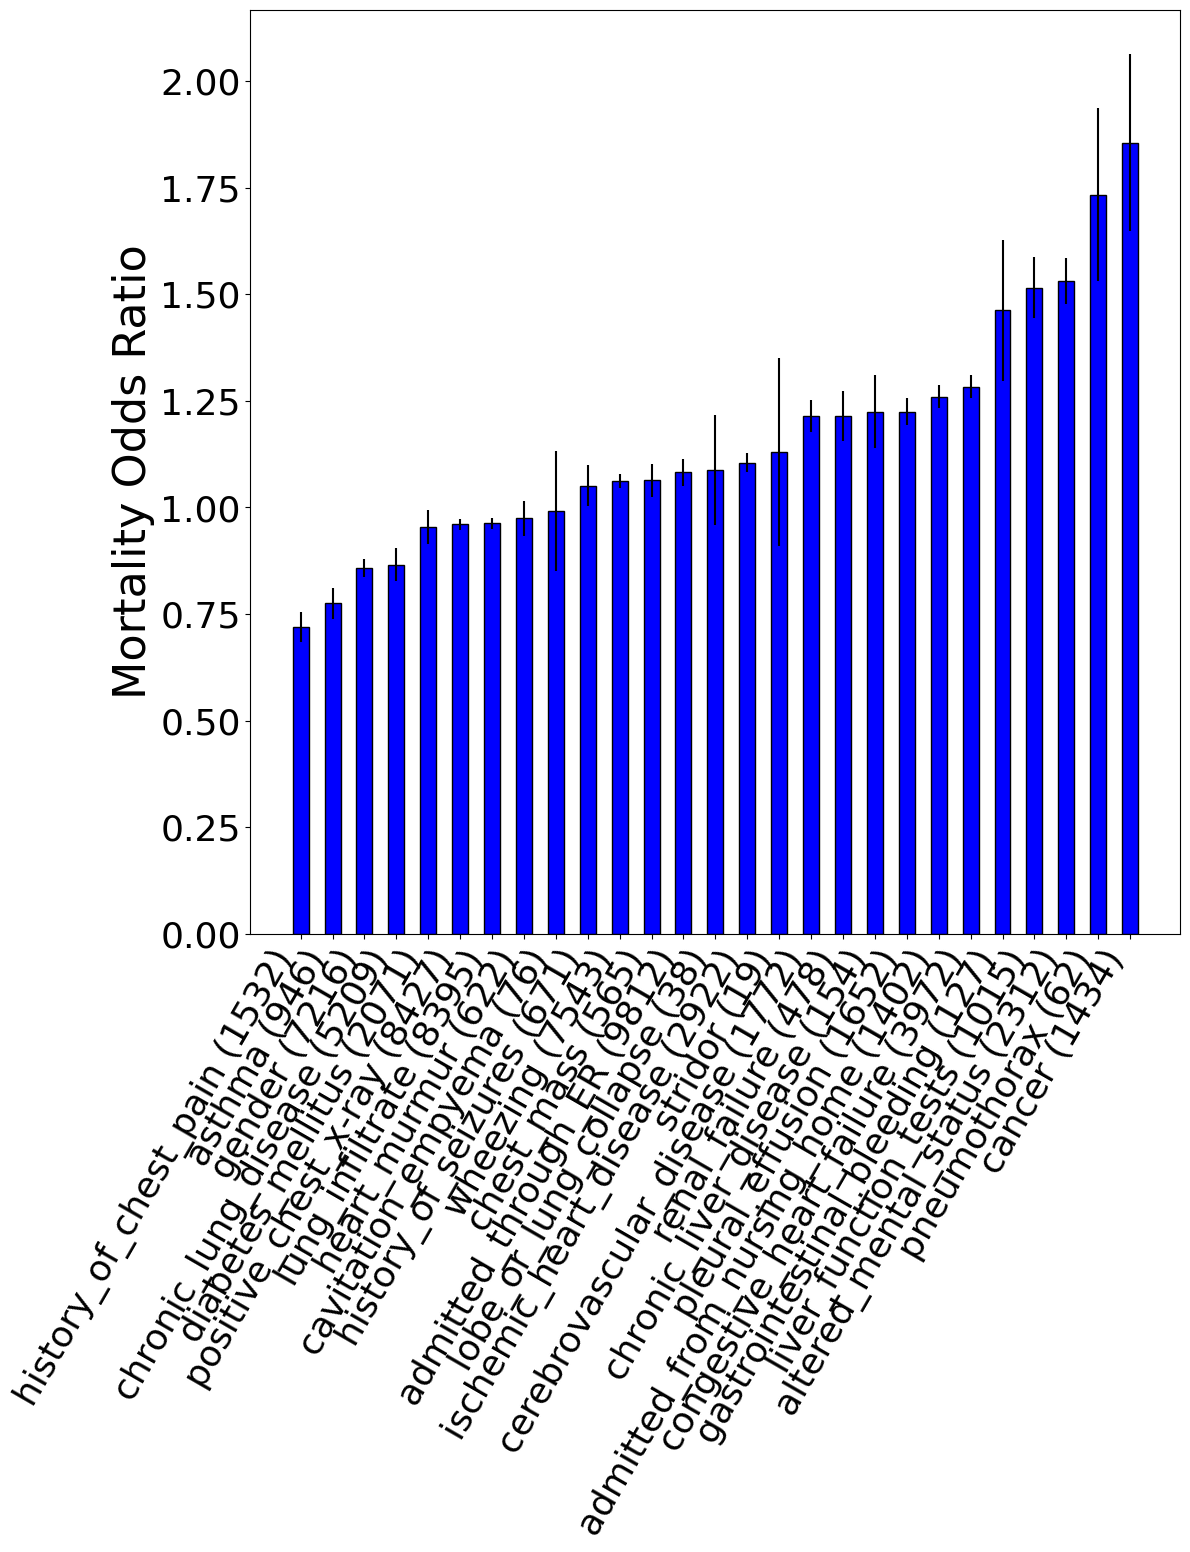

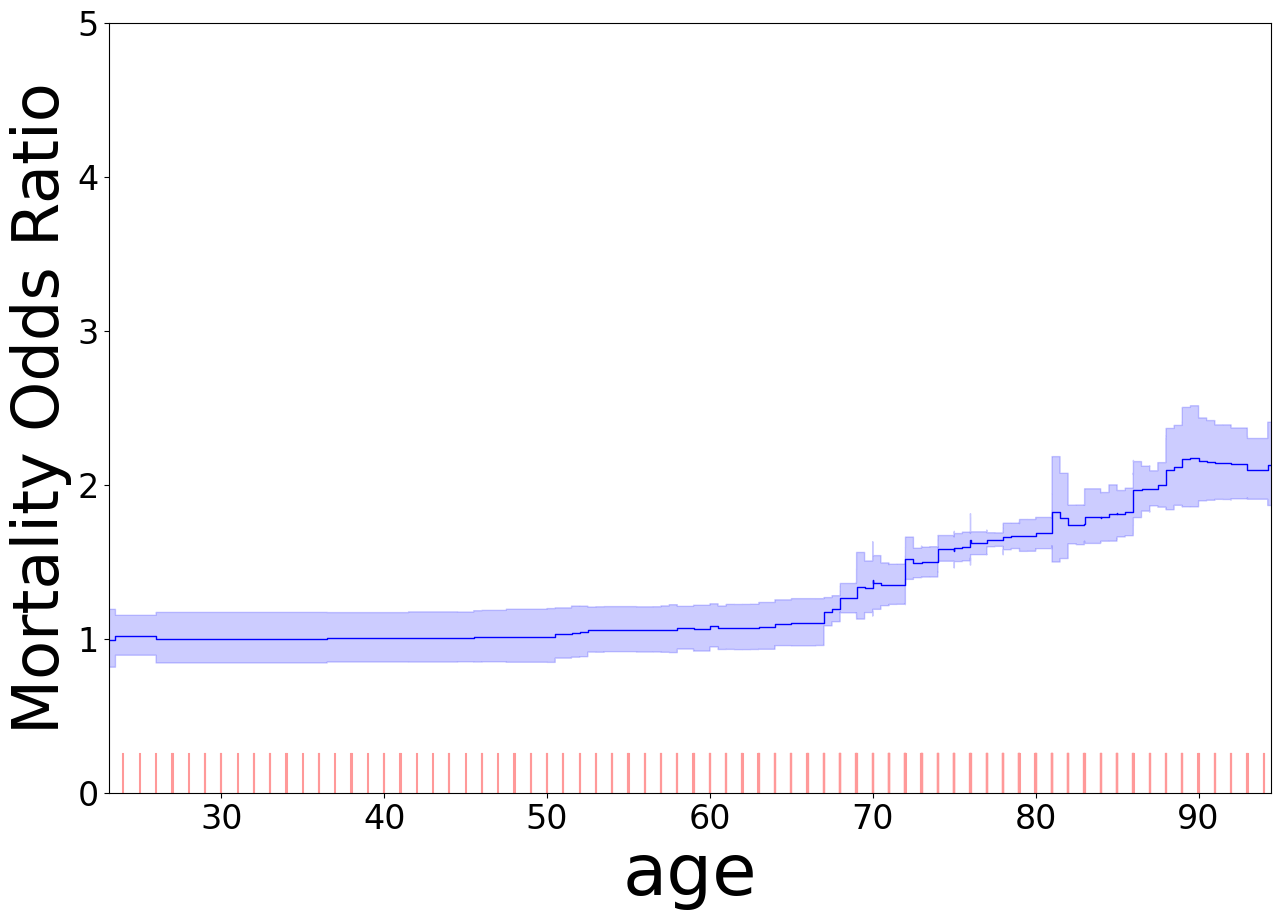

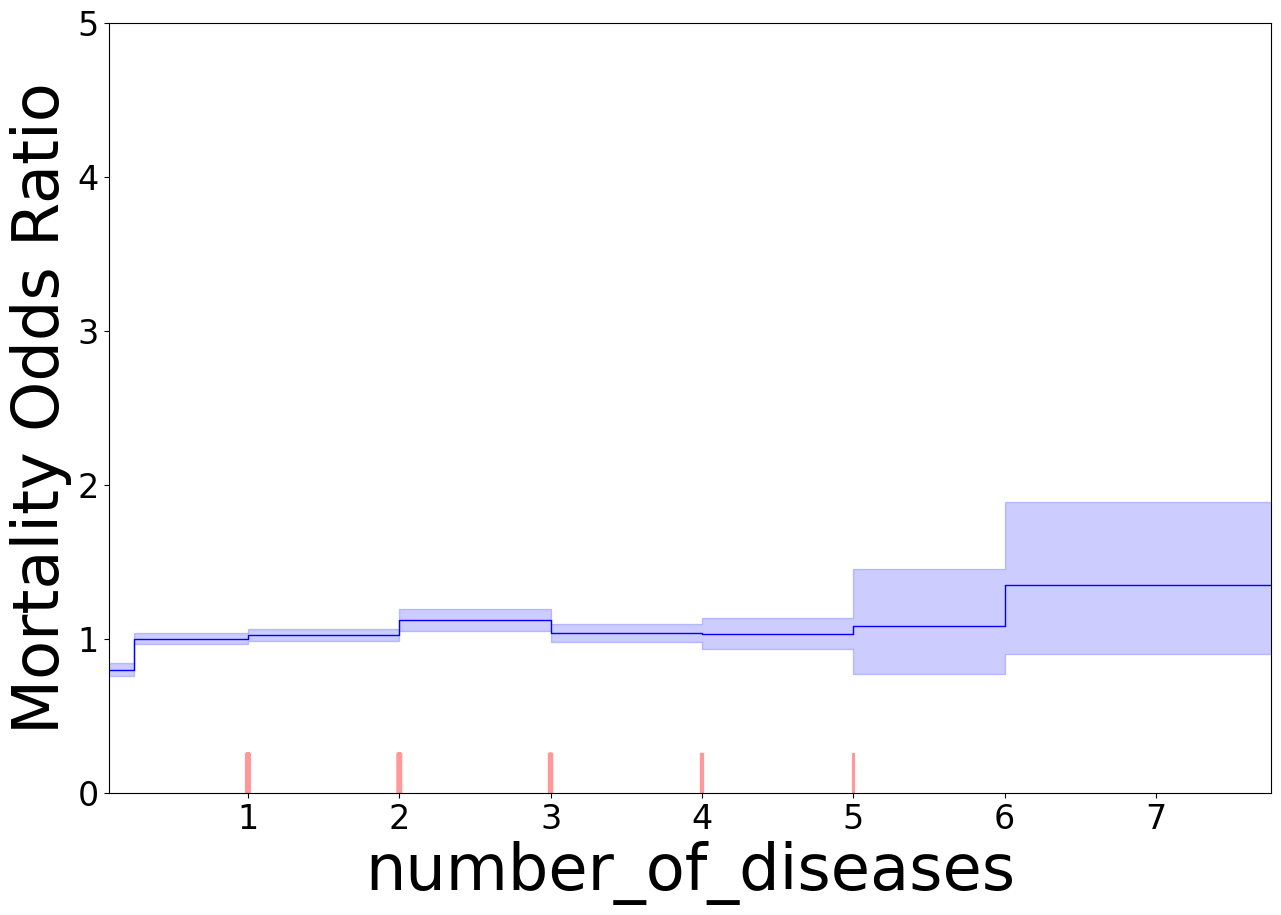

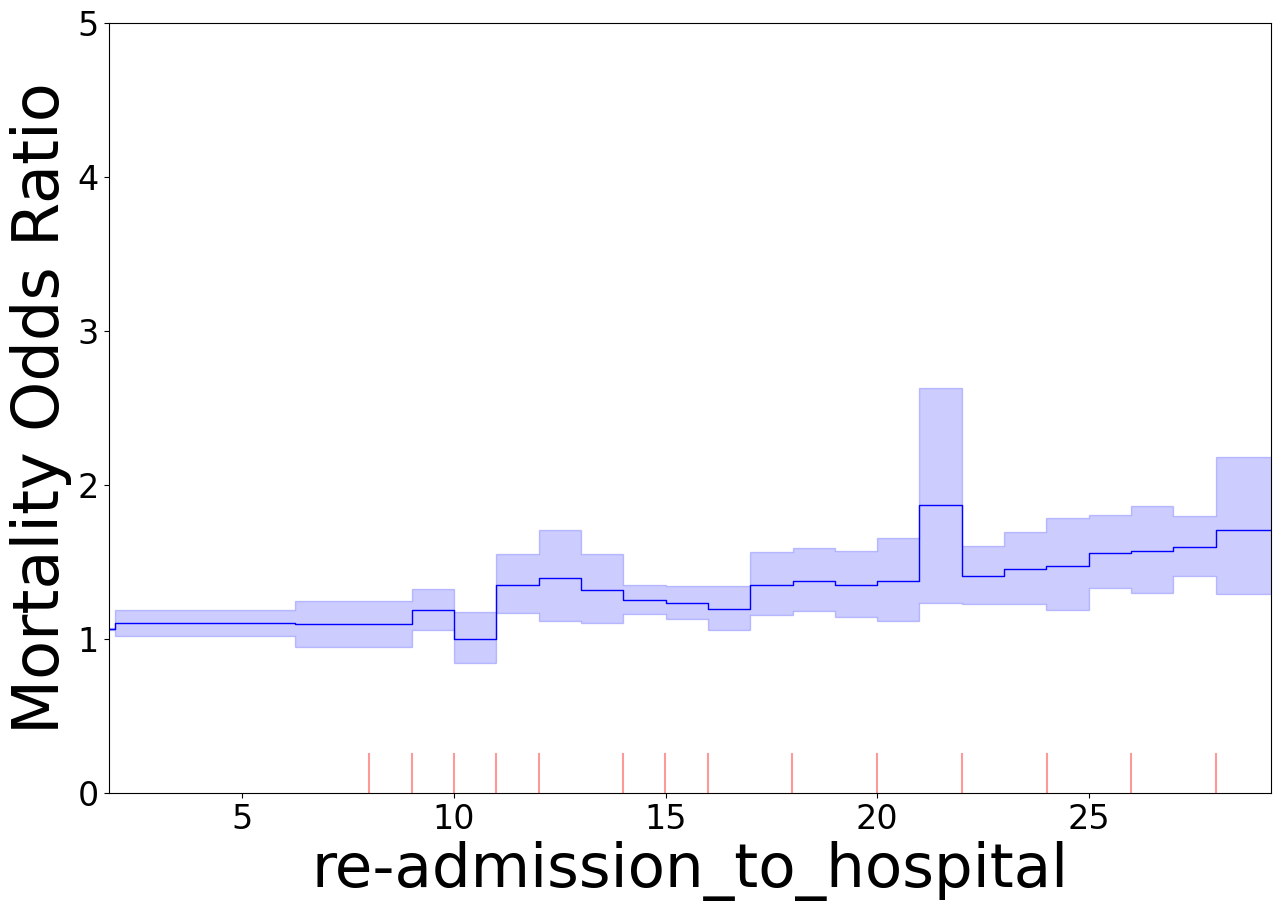

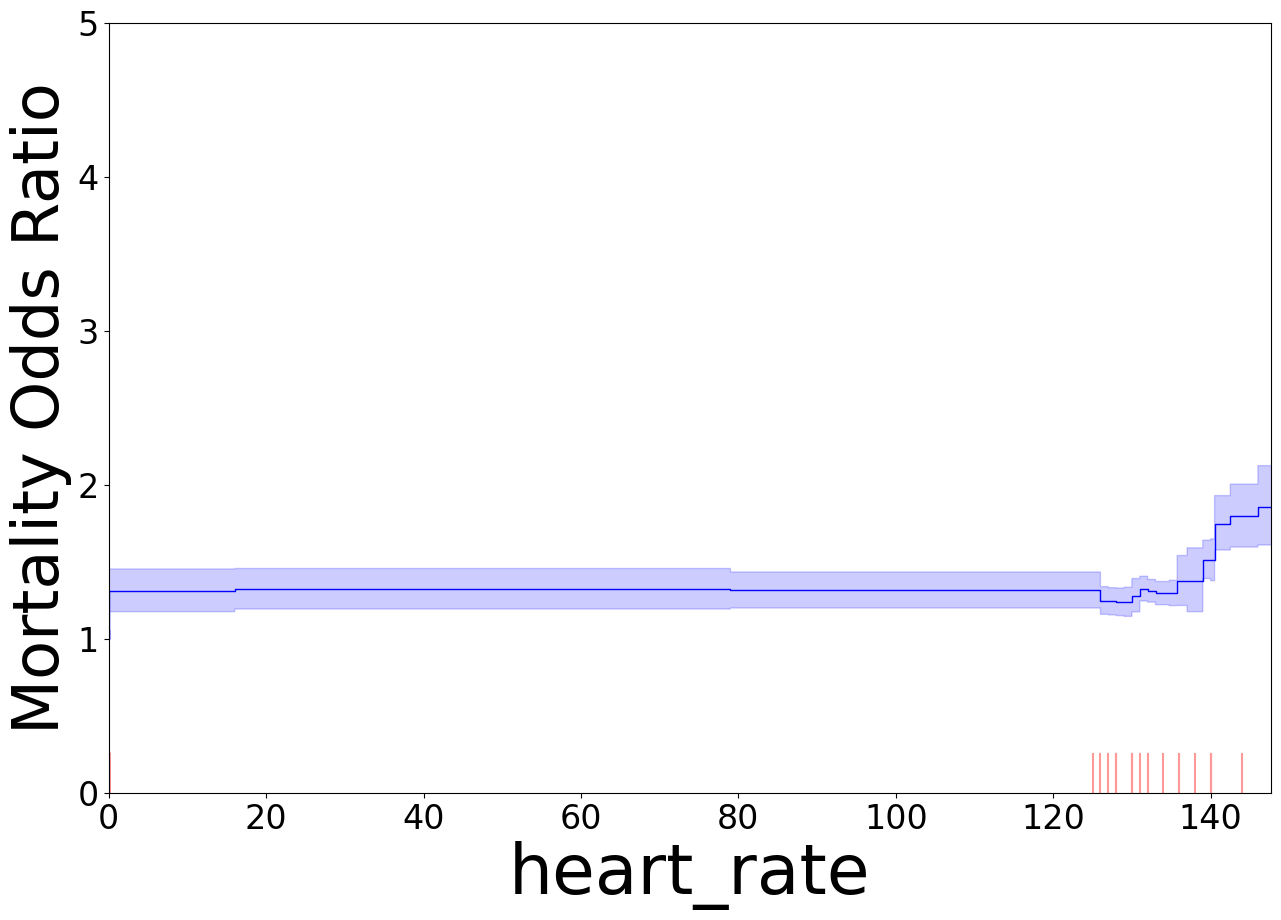

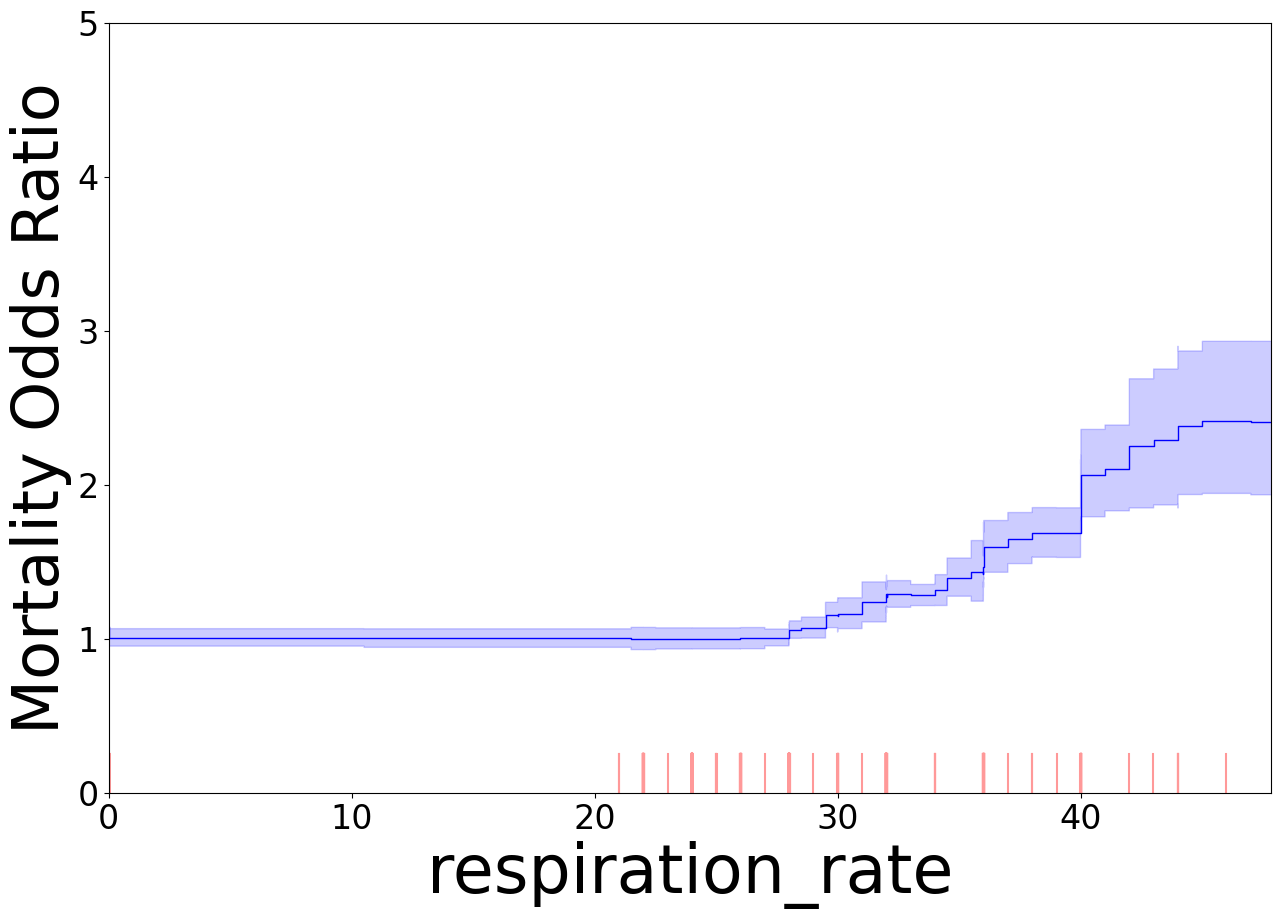

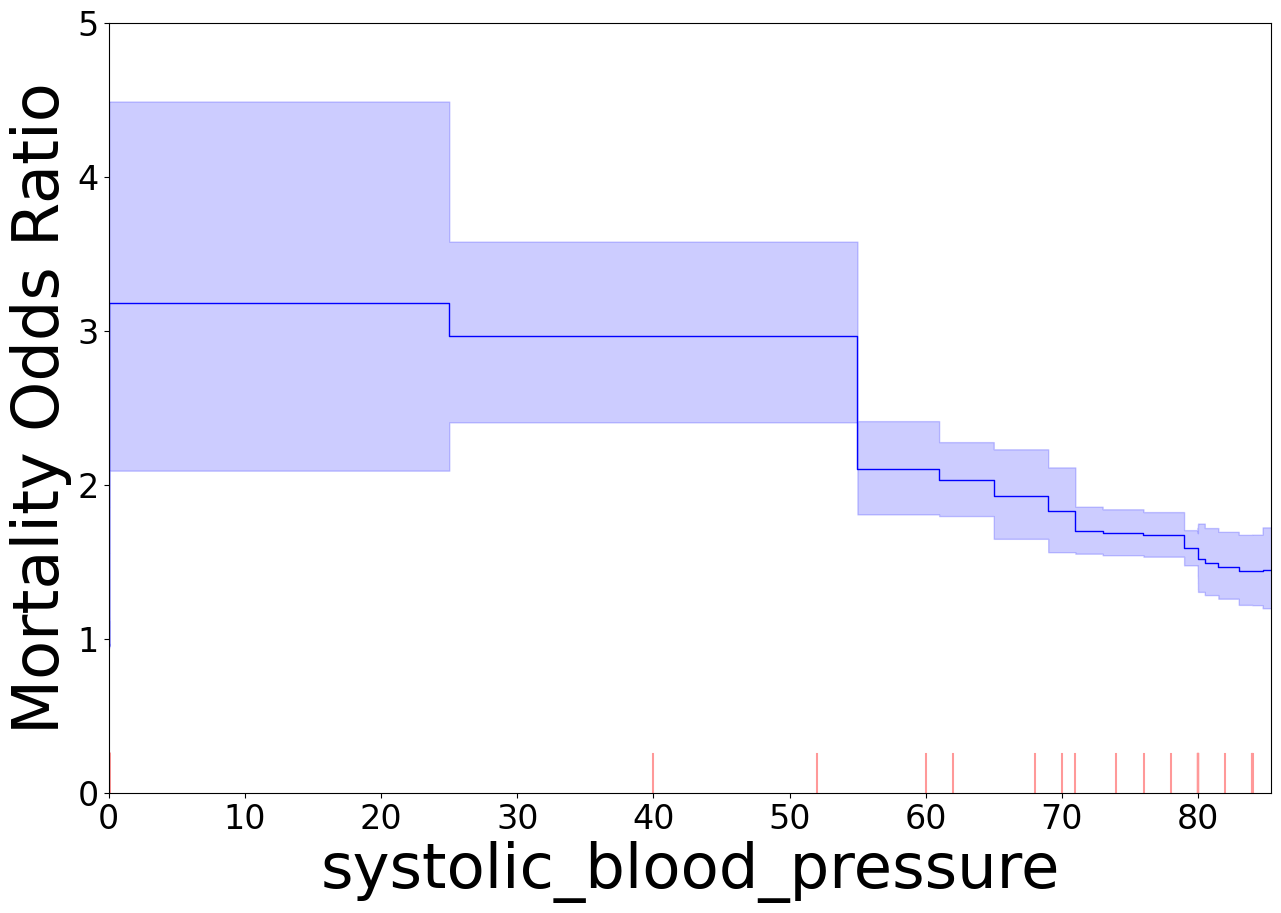

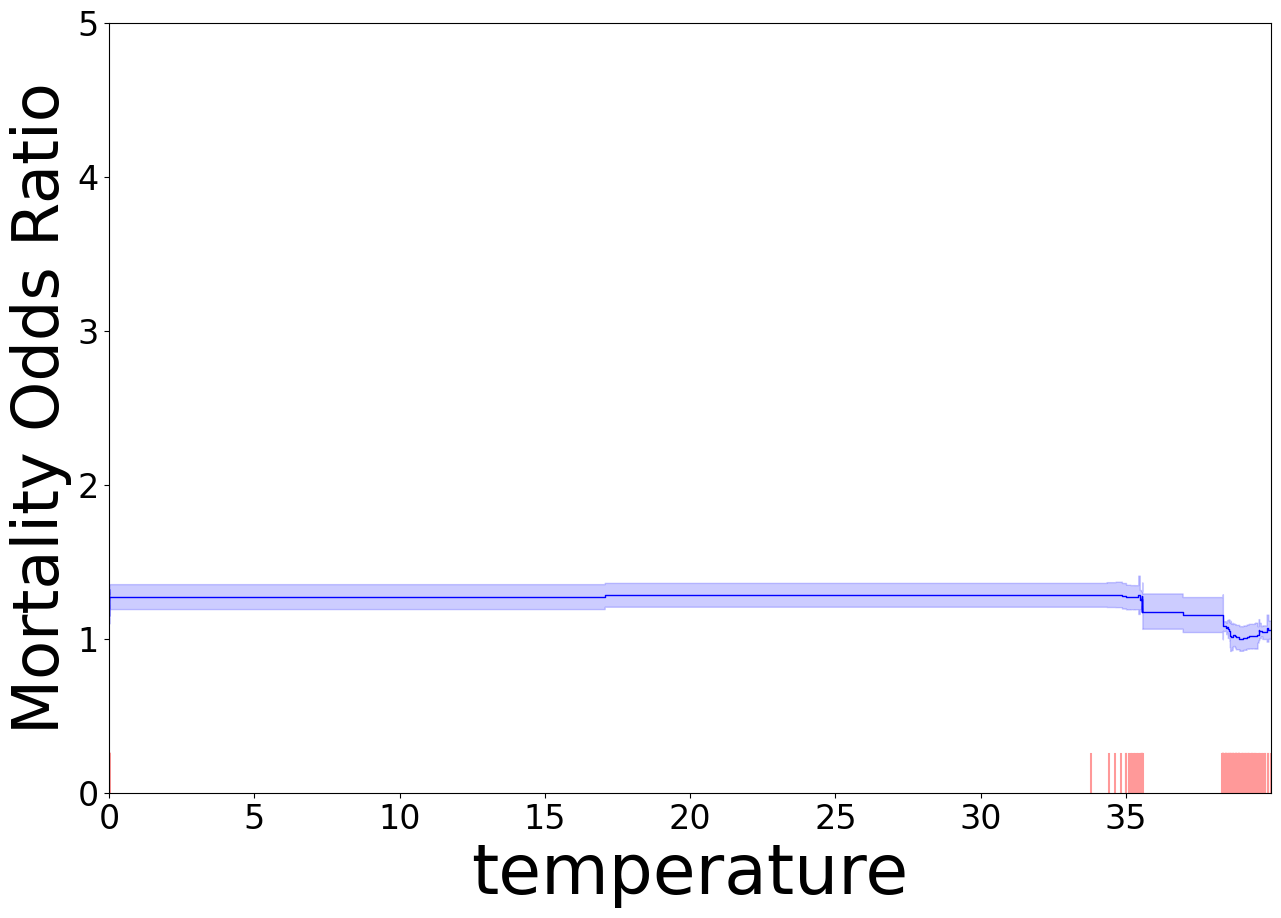

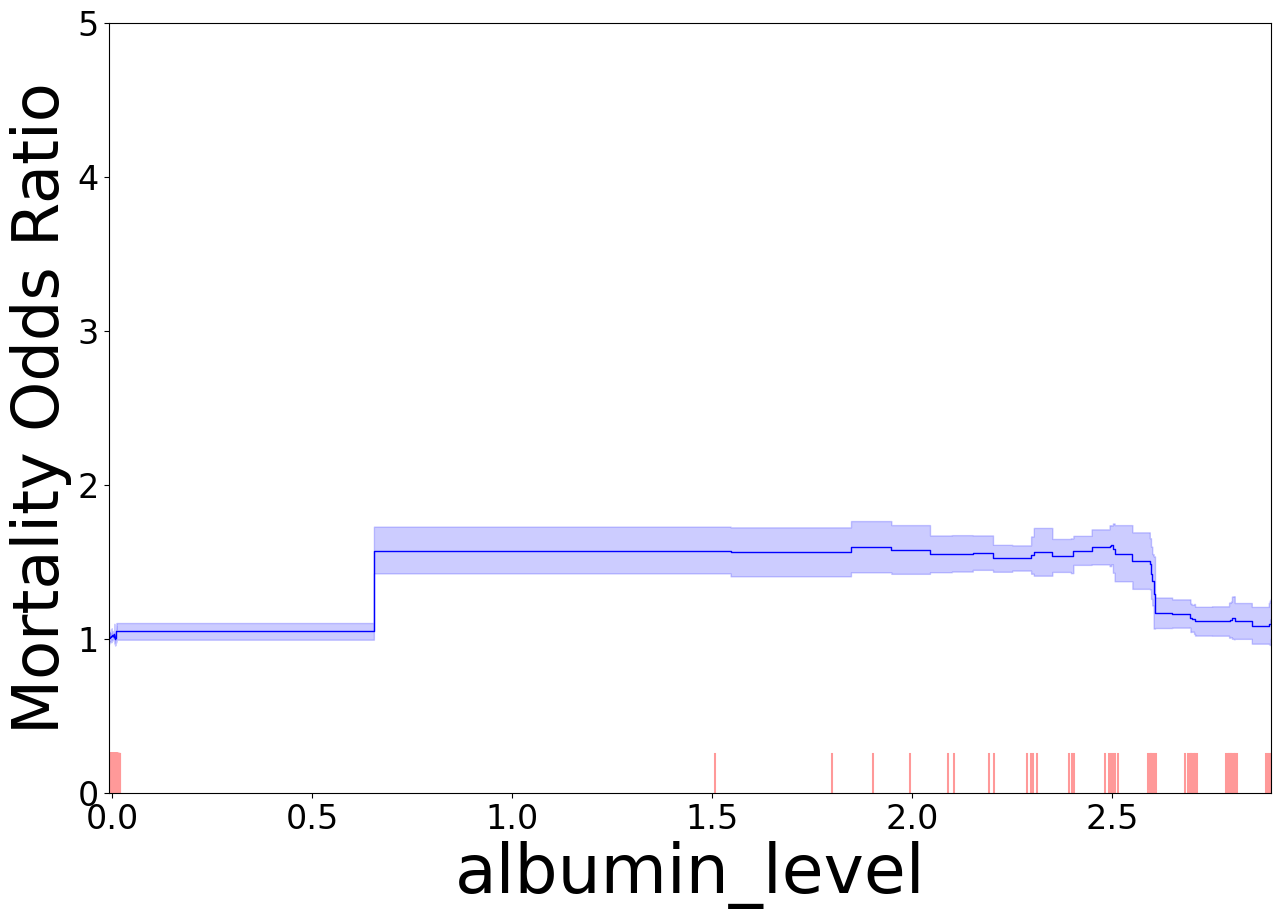

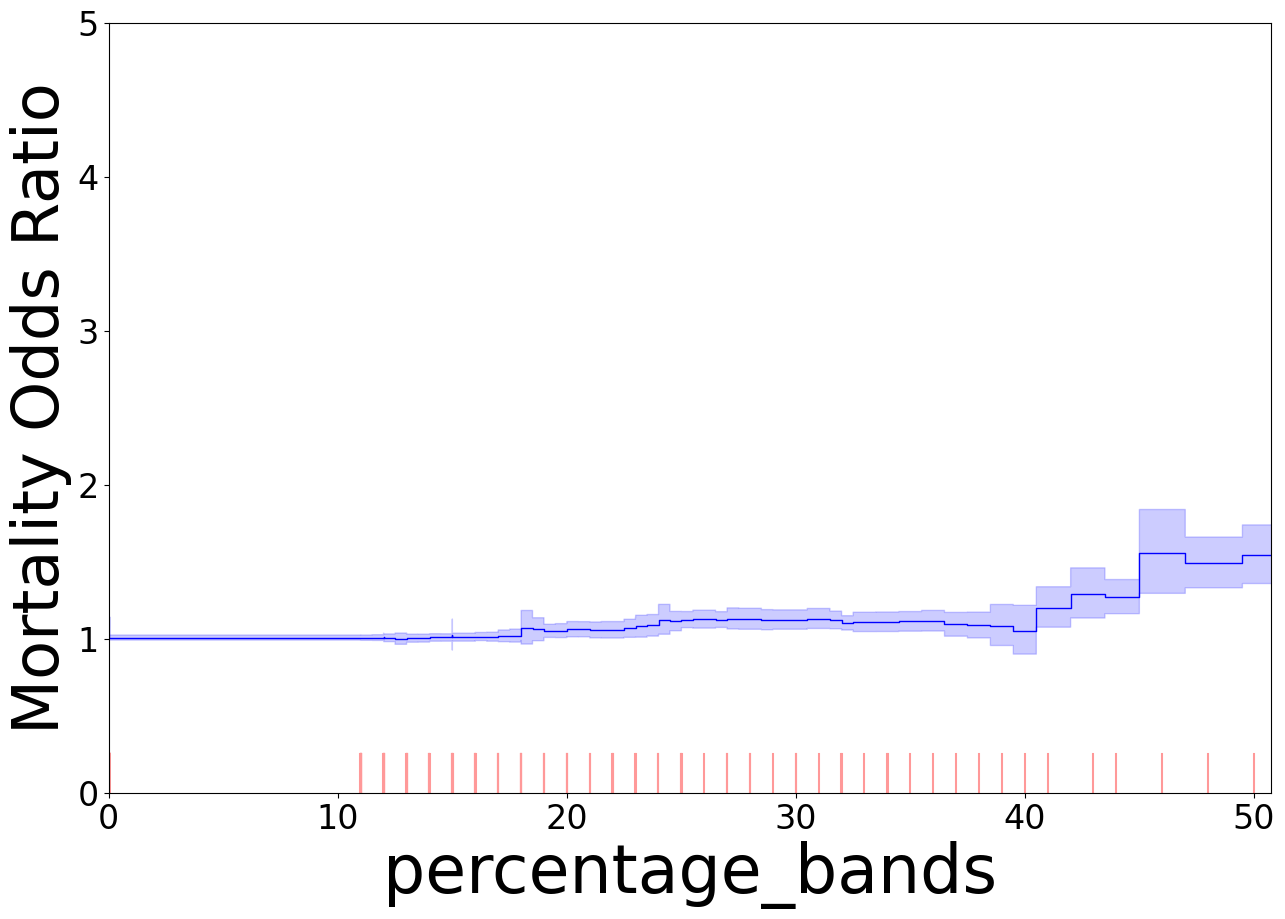

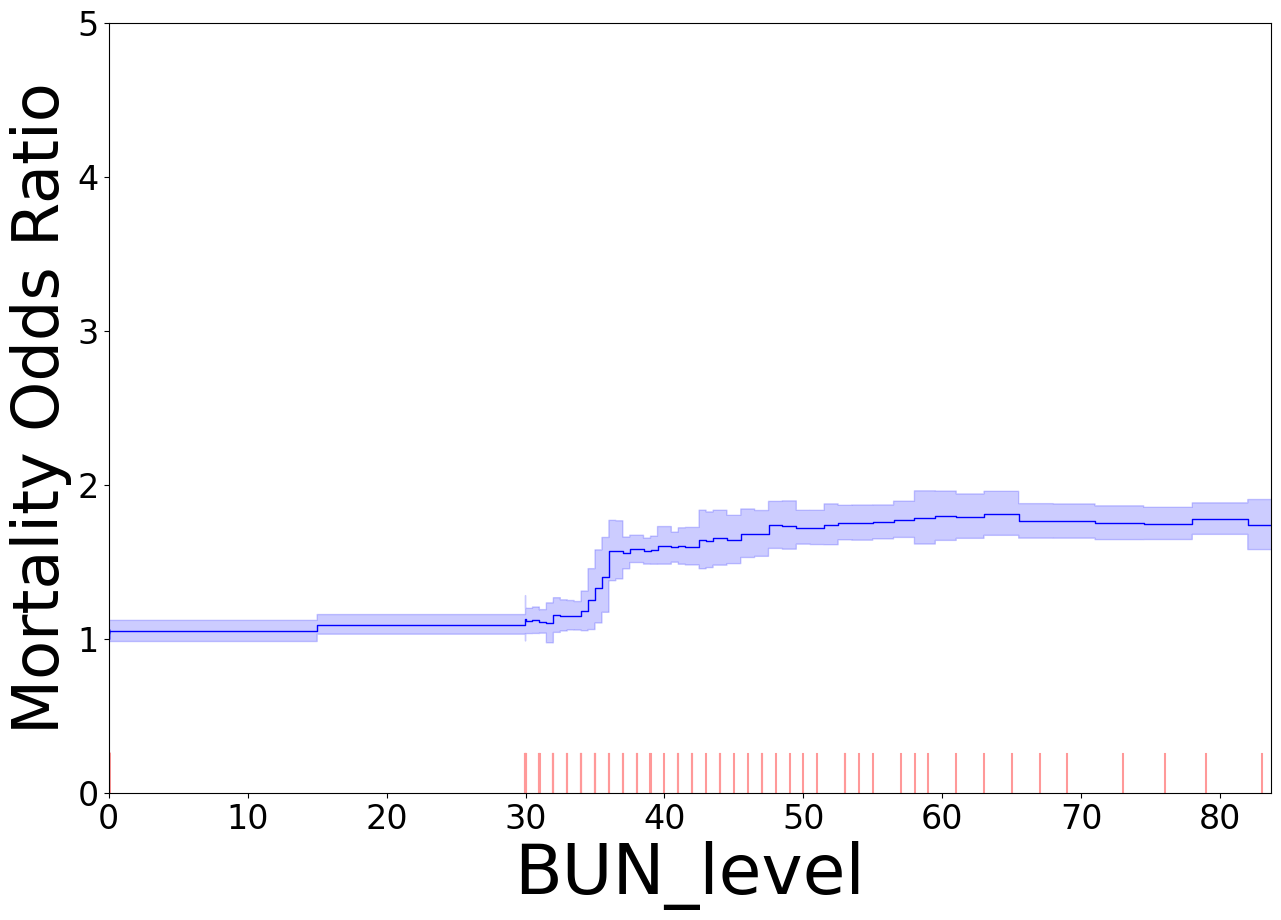

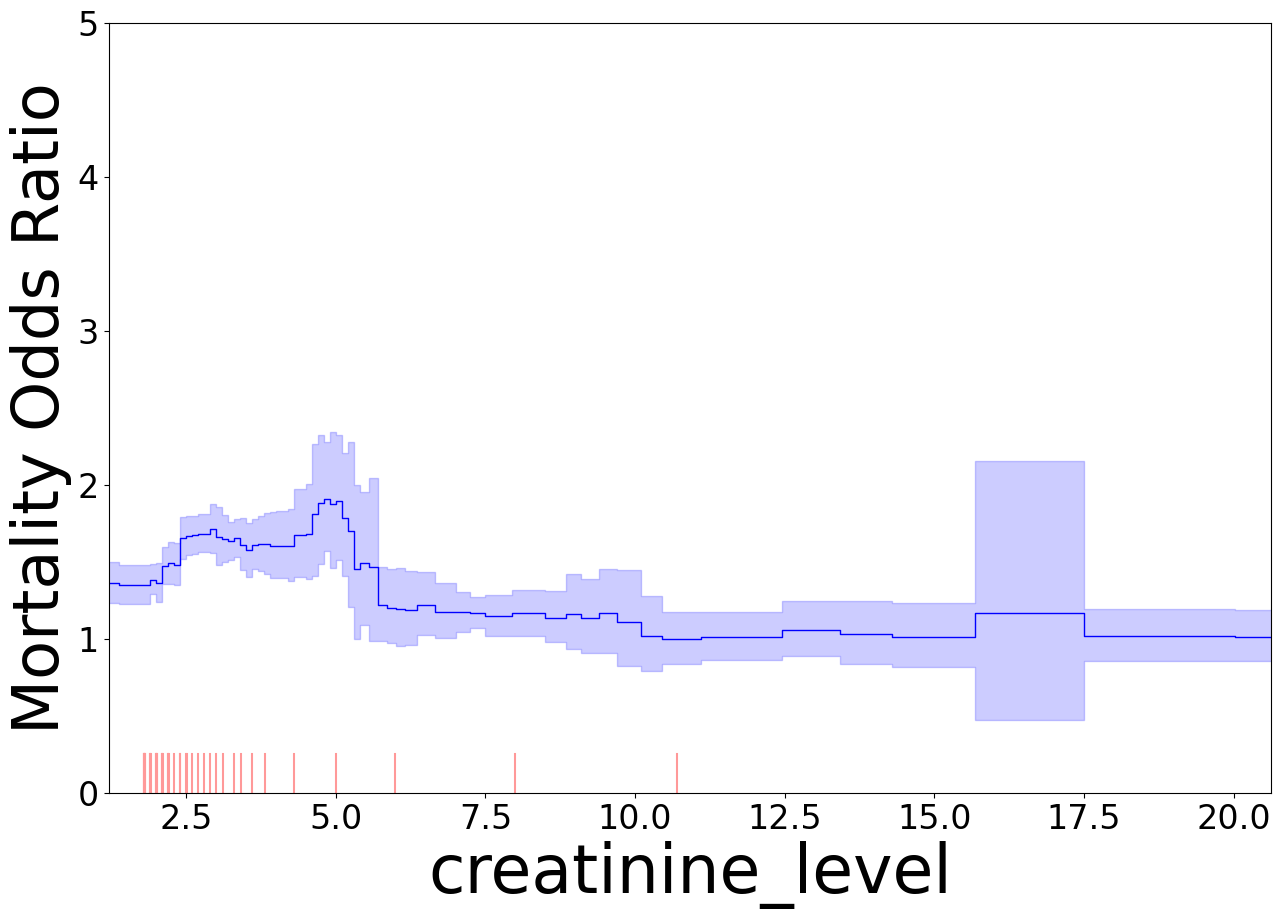

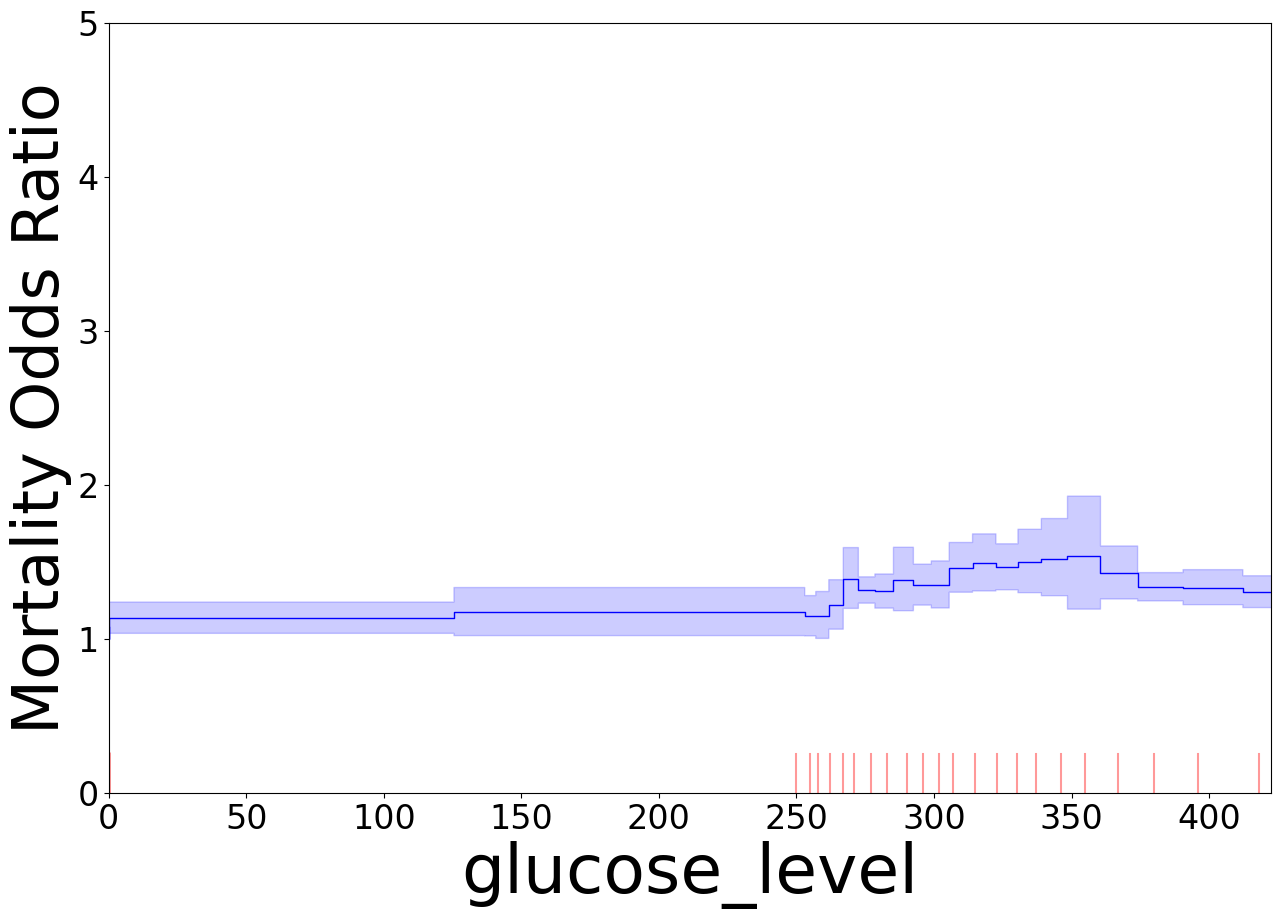

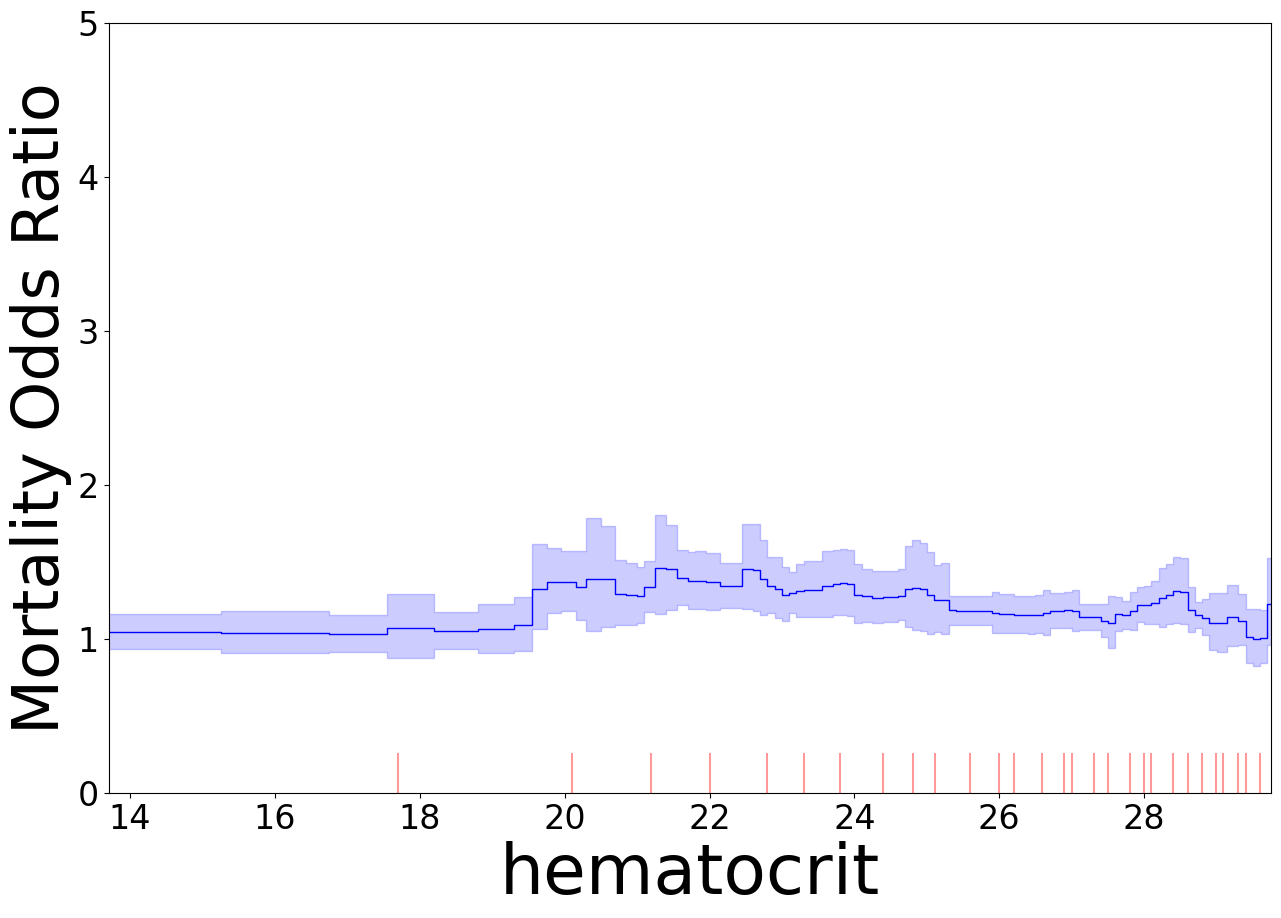

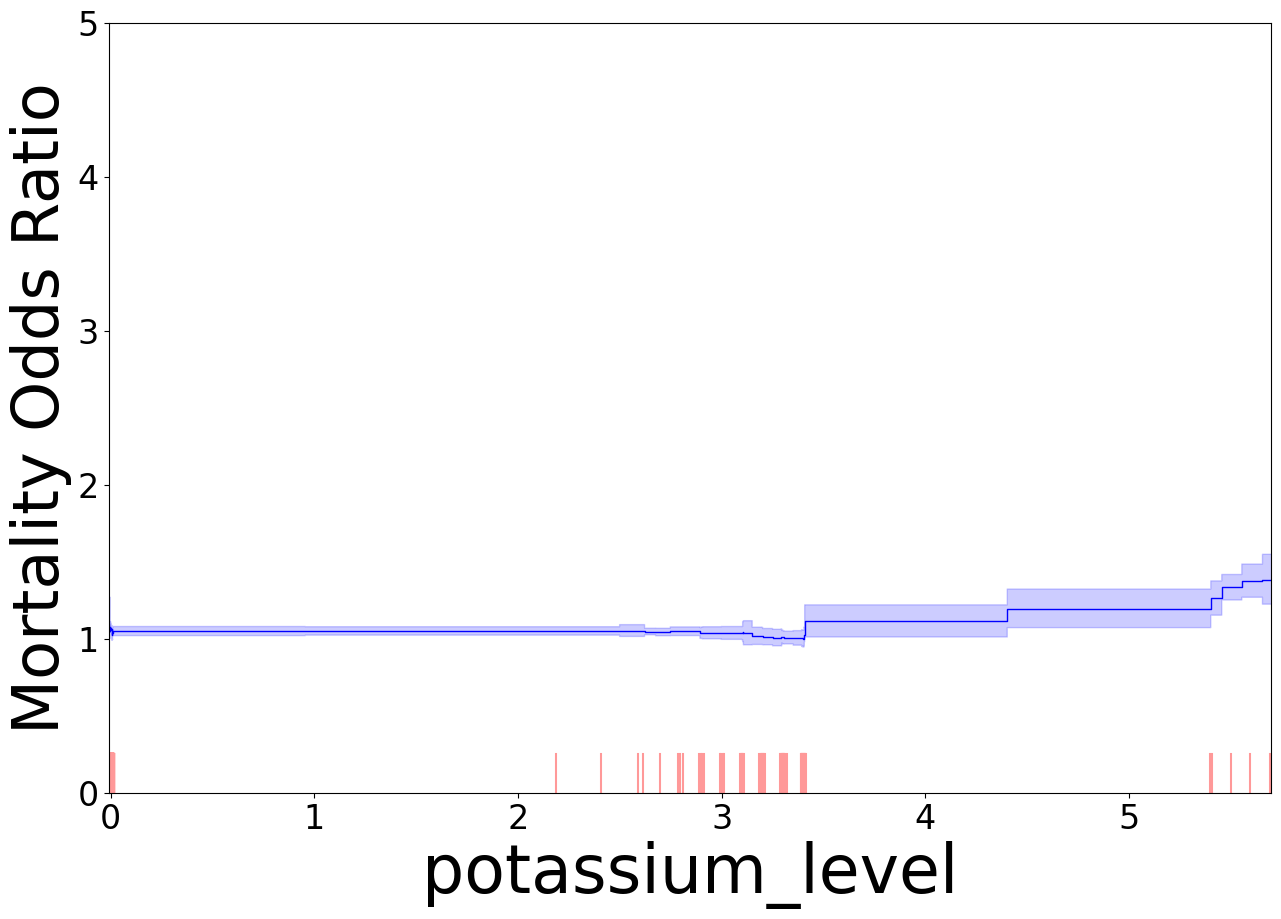

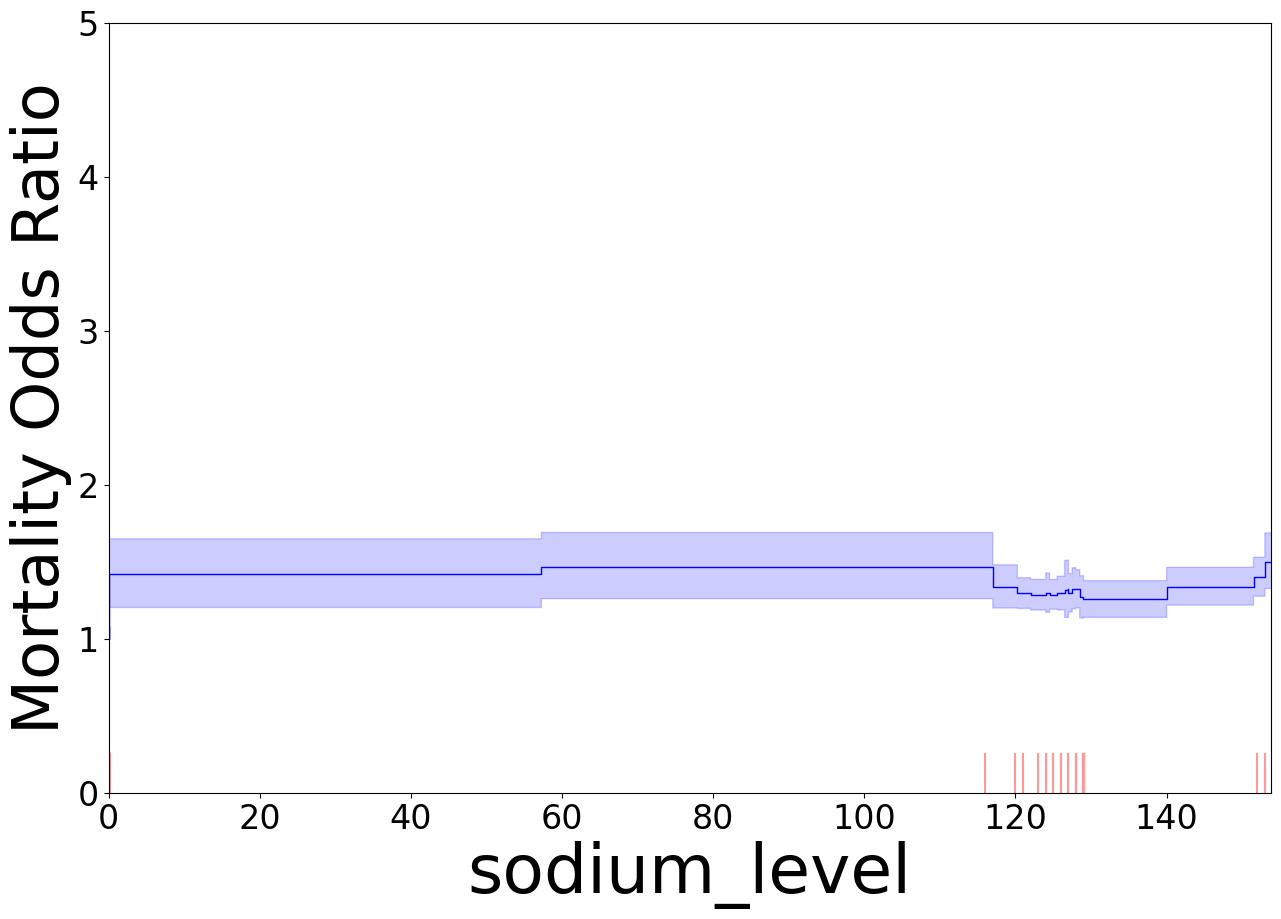

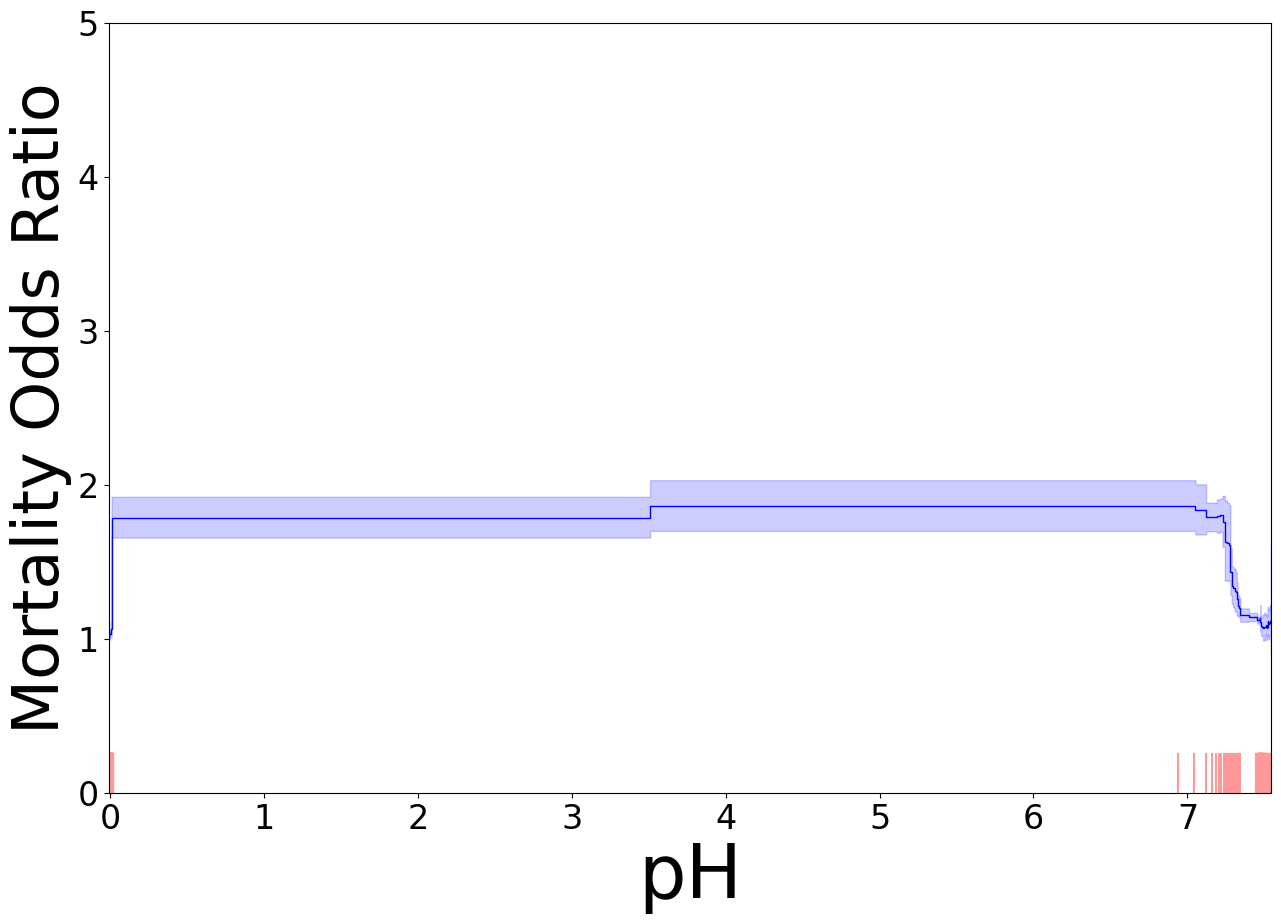

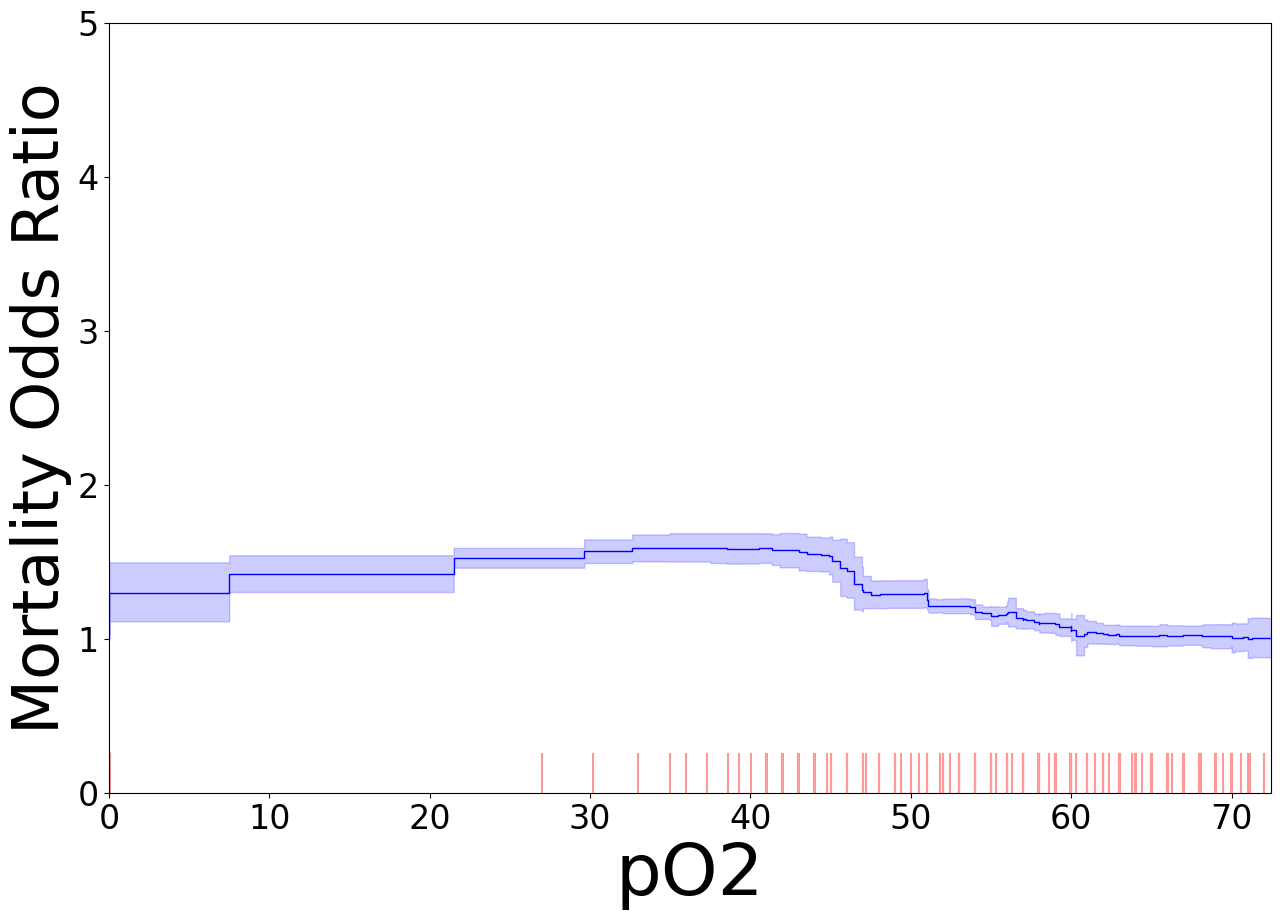

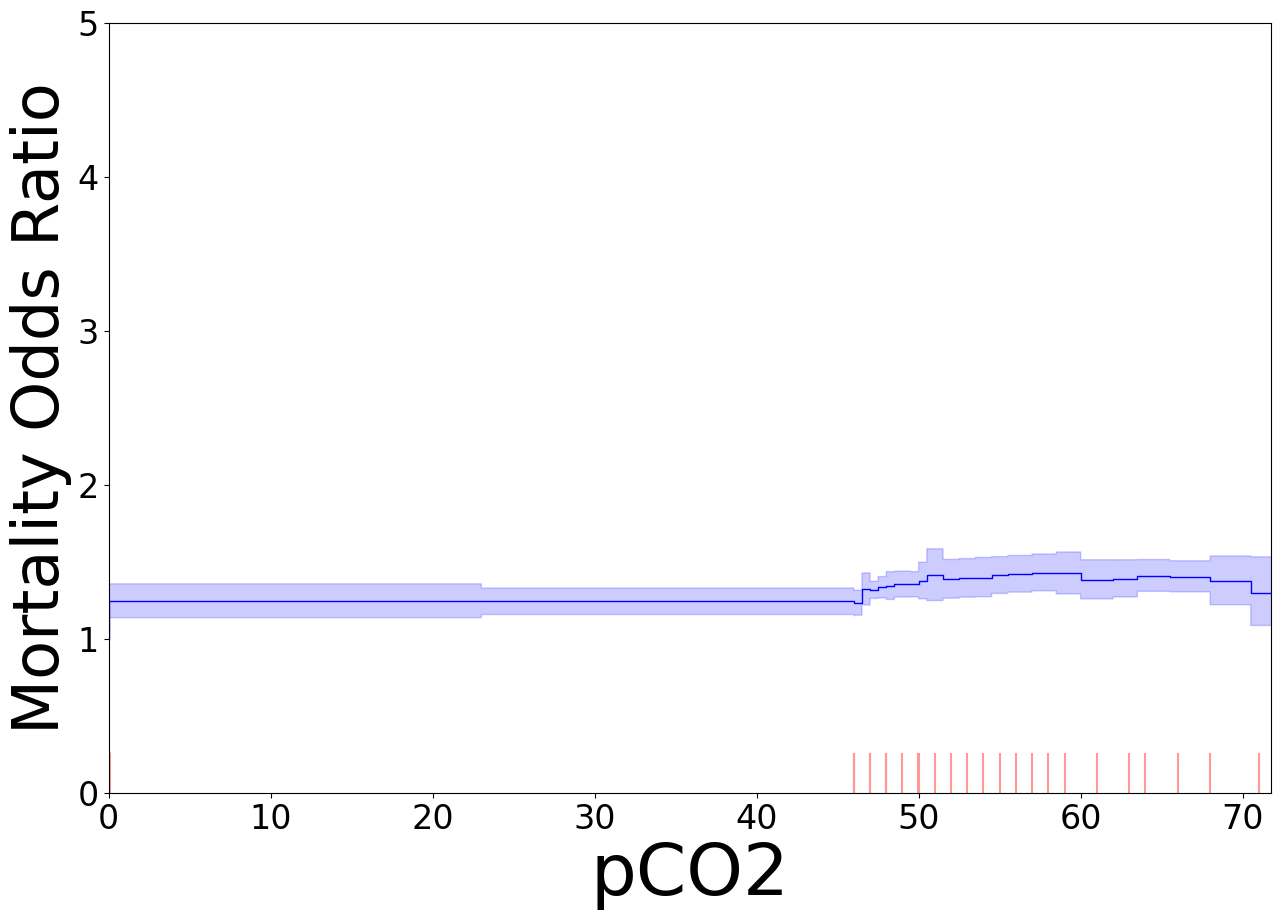

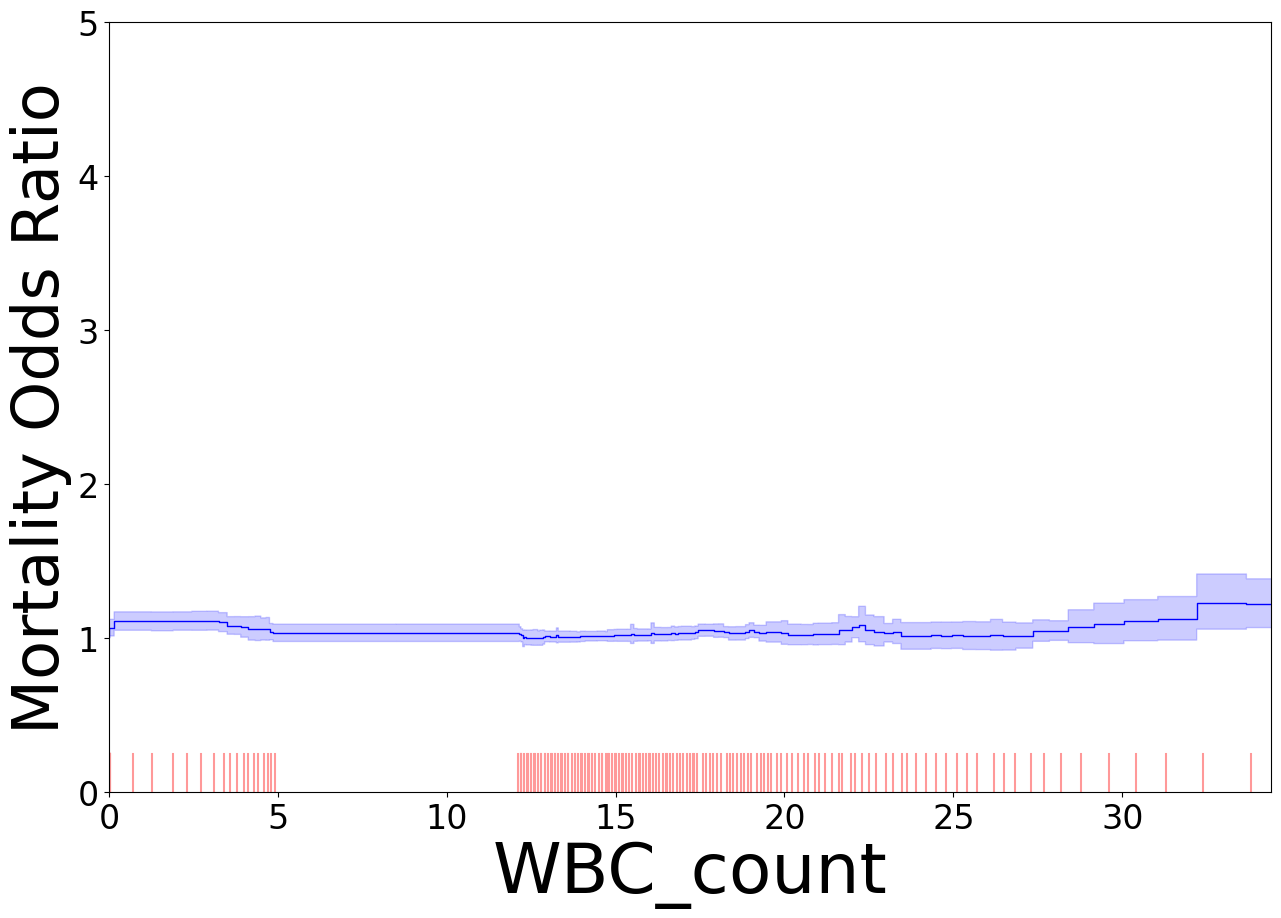

In [6]:
# Plot all effects.
from ebm_utils.analysis.plot_utils import plot_all_features
plot_all_features(
    ebm_global, X,
    bool_mpl_style=True, bool_figsize=(12, 12),
    ylabel='Mortality Odds Ratio',
)